In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
pd.set_option('display.max_rows',2000)

%run ../shared_datasets/charlie_functions.py
%run ../shared_datasets/clean_dataframe.py

sns.set(rc={'figure.figsize':(12,10)})

In [2]:
raw_data = pd.read_csv('/Users/schlinkertc/Flatiron/projects/mod4_project/developer_survey_2019/survey_results_public.csv')

dataframe_class = CleanDataframe(raw_data)
df = dataframe_class.cleaned_df

## Regression using OLS

After setting our X and Y variables, we're ready to being our linear regression. The sm_OLS fucntion, defined in 'charlie_functions.py', uses statsmodels.api.LinearRegression() 

- First we solve for the ordinary least squares regression and return performance metrics, coefficient values, and predicted vs observed outcomes.
- Next, the recursive ols function will run the regression, elimnate any coeffecients with a p-value above .05, and run the regression again. 
    - This will repeat until all coefficients have an an acceptable p-value.

In [3]:
# set X and Y
X = df.drop(columns=['Respondent','ConvertedComp'])
Y = df['ConvertedComp']

X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

In [4]:
sm_performance,sm_variables,sm_outcomes = sm_OLS(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [5]:
sm_variables

,coef,std err,t,P>|t|,[0.025,0.975]
const,3.564922e+03,5.639680e+02,6.321,0.000,2.459475e+03,4.670370e+03
WorkWeekHrs,2.941208e+02,3.288200e+01,8.945,0.000,2.296680e+02,3.585730e+02
YearsCode,1.837077e+02,5.456300e+01,3.367,0.001,7.675800e+01,2.906580e+02
Age,3.456080e+01,4.558300e+01,0.758,0.448,-5.478800e+01,1.239100e+02
CodeRevHrs,1.951218e+02,6.466600e+01,3.017,0.003,6.836900e+01,3.218750e+02
YearsCodePro,1.455172e+03,9.514400e+01,15.294,0.000,1.268678e+03,1.641665e+03
learned_code,-1.491469e+02,4.144200e+01,-3.599,0.000,-2.303790e+02,-6.791500e+01
Assembly,-2.983726e+02,1.484709e+03,-0.201,0.841,-3.208590e+03,2.611845e+03
Bash/Shell/PowerShell,1.342729e+03,5.610150e+02,2.393,0.017,2.430690e+02,2.442388e+03
C,-1.466466e+03,9.136560e+02,-1.605,0.109,-3.257347e+03,3.244150e+02


In [ ]:
sns.scatterplot(x=sm

In [6]:
# make a deep copy of our X values for the recursive function
X_recursive = pd.DataFrame.copy(X,deep=True)
recursive_performance,recursive_variables,recursive_outcomes = ols_recursion(X_recursive,Y)

predictors used:  288
Predictors to drop:  140
Running regression with new subset of predictors...
predictors used:  148
Predictors to drop:  22
Running regression with new subset of predictors...
predictors used:  126
Predictors to drop:  4
Running regression with new subset of predictors...
predictors used:  122
Predictors to drop:  4
Running regression with new subset of predictors...
predictors used:  118
Predictors to drop:  0
Complete. No coefficients with P-value greater than .05 remain


By eliminating predictors with p-values above .05 recursively, we've cut our number of variables down from 294 to 118. Eliminating these variables had very little effect on our regression performance. 

In [7]:
comparison = pd.concat((sm_performance.transpose(),recursive_performance.transpose()),ignore_index=True)
comparison.index = ['288 predictors','118 predictors']
comparison

,MSE,MSE_resid,RMSE,R^2,R^2_adjusted,F-stat,AIC,BIC
288 predictors,8.378591e+10,8.386588e+08,28959.607115,0.631943,0.625618,99.904641,349064.348073,350989.726078
118 predictors,2.265275e+11,8.447759e+08,29065.028305,0.624651,0.622321,268.151008,436291.427705,437200.100589


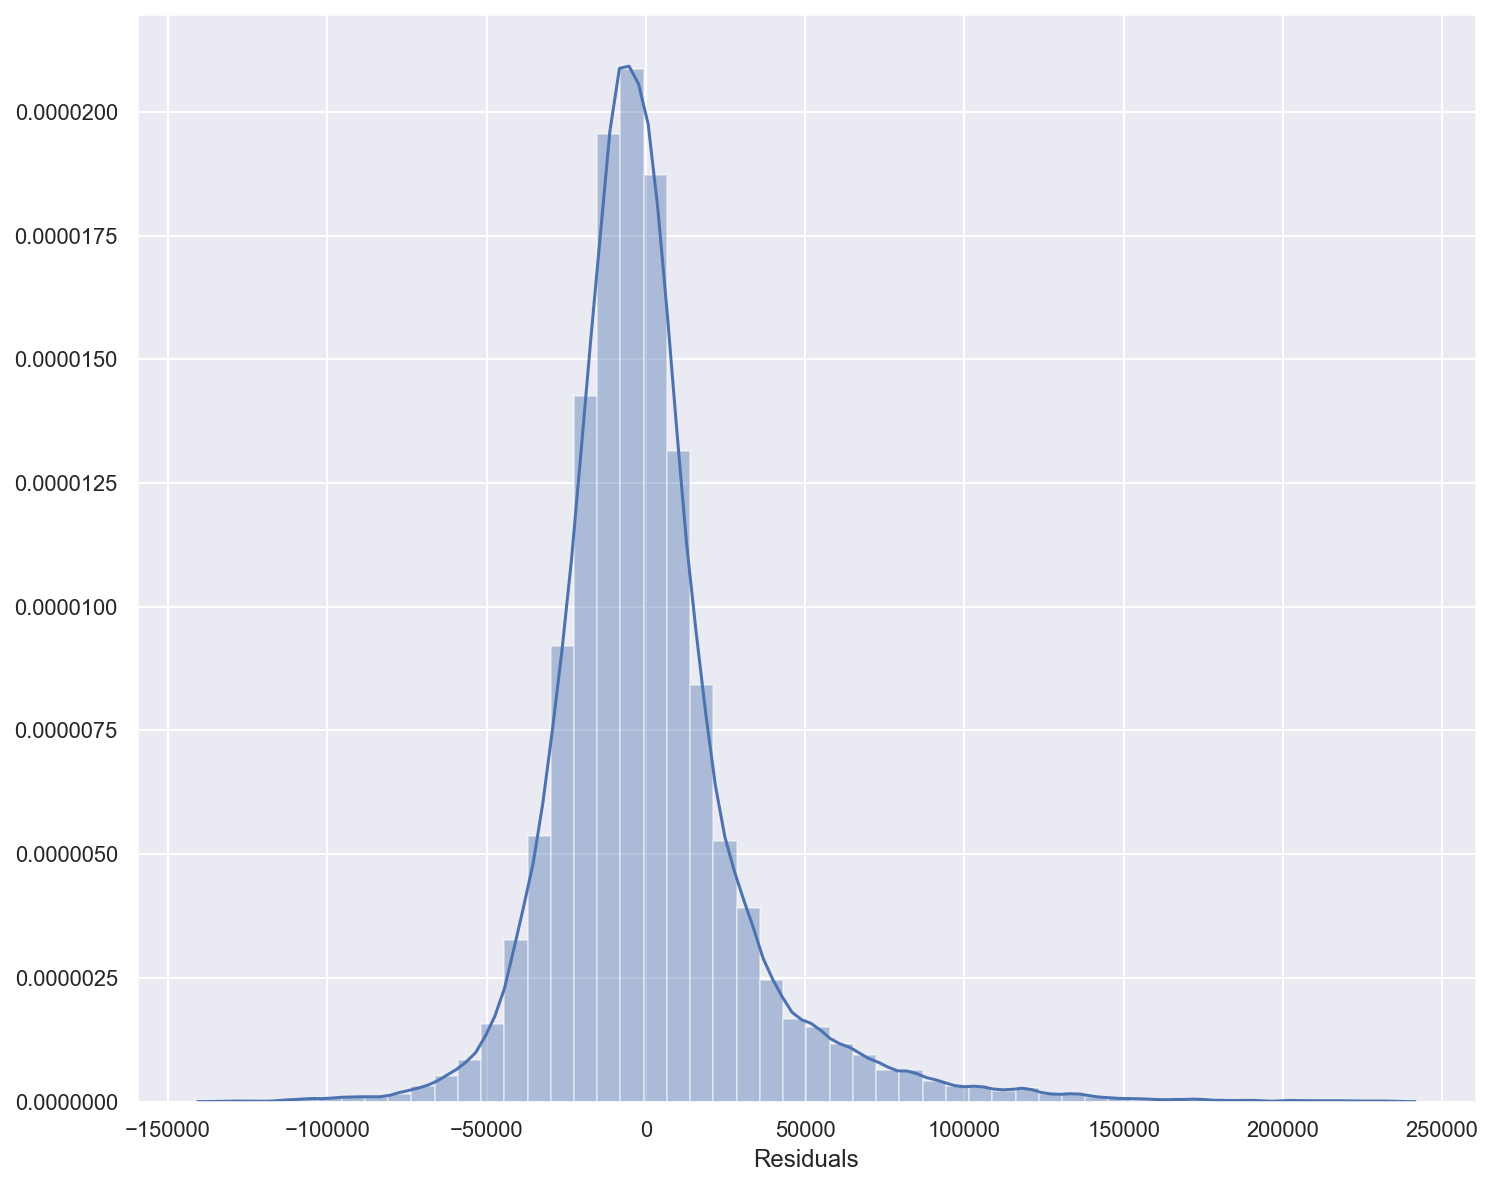

In [8]:
# Check residuals for normality
sns.set_style('darkgrid')
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})

sns.distplot(recursive_outcomes['Residuals'])

In [9]:
def QQplot(outcomes):
    
    z= (outcomes['Predicted']-outcomes['Predicted'].mean())/np.std(outcomes['Predicted'])
    stats.probplot(z, dist="norm", plot=plt)
    
    plt.title("Q-Q plot")
    plt.show()

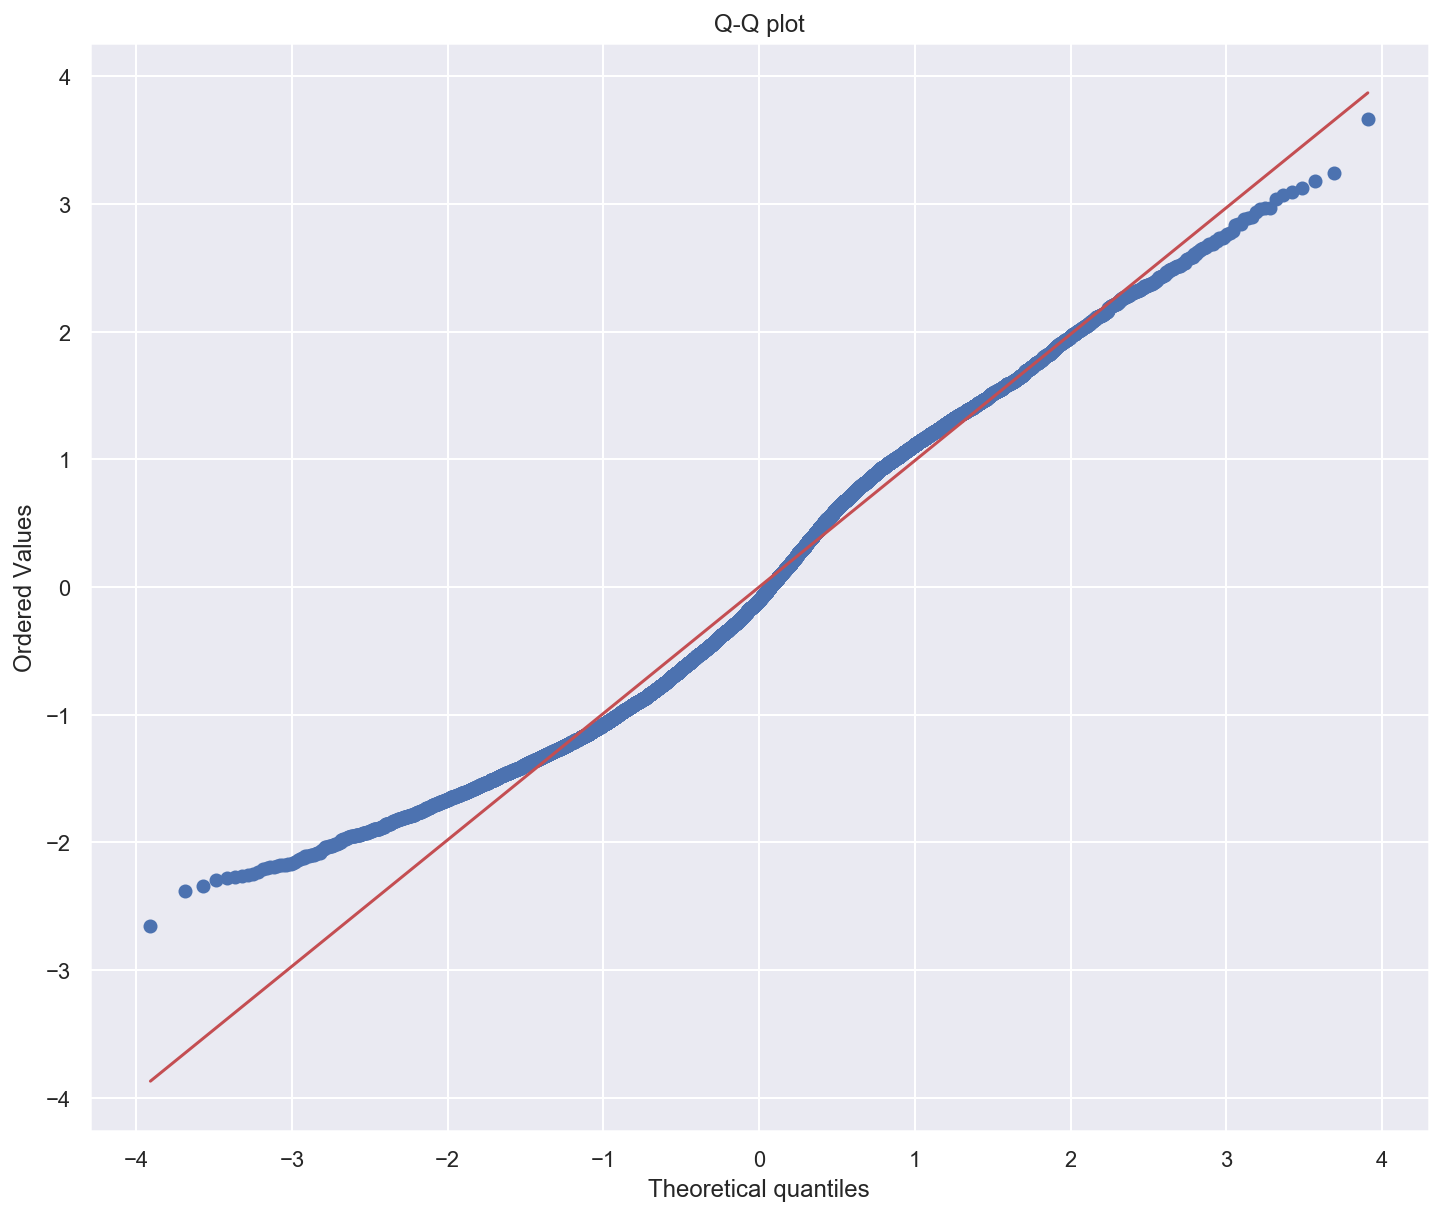

In [10]:
QQplot(sm_outcomes.rename(columns={'Observed_values':'Observed','Predicted_values':'Predicted'}))

## Log transform our Y-variable

According to University of Virginia: 
- "Log transformations are often recommended for skewed data, such as monetary measures or certain biological and demographic measures. Log transforming data usually has the effect of spreading out clumps of data and bringing together spread-out data." 

- We can't log-transform our predictors because we have dummy variables

- rules for interpretation when the outcome is transformed: 
    - Exponentiate the coefficient, subtract one from this number, and multiply by 100. This gives the percent increase (or decrease) in the response for every one-unit increase in the independent variable. Example: the coefficient is 0.198. (exp(0.198) – 1) * 100 = 21.9. For every one-unit increase in the independent variable, our dependent variable increases by about 22%.

In [11]:
X_train_recursive = X_train[X_recursive.columns.tolist()]

In [12]:
log_performance, log_variables, log_outcomes = sm_OLS(X_train_recursive,np.log(y_train))

In [13]:
log_performance = log_performance.transpose()
log_performance.index=['118 predictors, log transformed']

In [14]:
comparison = comparison.append(log_performance)
comparison

,MSE,MSE_resid,RMSE,R^2,R^2_adjusted,F-stat,AIC,BIC
288 predictors,8.378591e+10,8.386588e+08,28959.607115,0.631943,0.625618,99.904641,349064.348073,350989.726078
118 predictors,2.265275e+11,8.447759e+08,29065.028305,0.624651,0.622321,268.151008,436291.427705,437200.100589
"118 predictors, log transformed",4.903100e+01,1.599856e-01,0.399982,0.704261,0.701963,306.471266,15109.196028,15991.978038


### Investigating Multicollinearity


In [15]:
def investigate_multicollinearity(predictors):
    X = df[predictors]
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print(f"VIF: {len(vif)} columns compared")
    return list(zip(predictors, vif)), vif, predictors

In [16]:
list_vif, vif, x_keep = investigate_multicollinearity(X_recursive.columns.tolist())
# list_vif

//anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF: 117 columns compared


In [17]:
list_vif[:5]

[('WorkWeekHrs', 1.1100141682948108),
 ('YearsCode', 7.505189618043502),
 ('CodeRevHrs', 1.0658122327983113),
 ('YearsCodePro', 6.687649025638639),
 ('learned_code', 1.4084641162229683)]

In [18]:
def remove_vif_scores_greater_than_5(x_column_keep, vif):
    vif_scores = list(zip(x_column_keep, vif))
    x_keep = [x for x,vif in vif_scores if vif < 5]
    x_drop = [x for x,vif in vif_scores if vif > 5]
    print(f"Variance Inflation Factor (VIF): {len(vif_scores)} | To Keep: {len(x_keep)} | To Drop: {len(x_drop)}")
    return x_keep, x_drop

In [19]:
x_keep, x_drop = remove_vif_scores_greater_than_5(x_keep, vif)

Variance Inflation Factor (VIF): 117 | To Keep: 107 | To Drop: 10


In [20]:
vif_performance, vif_variables, vif_outcomes = sm_OLS(X_train[x_keep],np.log(y_train))

In [21]:
vif_performance = vif_performance.transpose()
vif_performance.index=['Multicolinearity Removed']

comparison = comparison.append(vif_performance)
comparison

,MSE,MSE_resid,RMSE,R^2,R^2_adjusted,F-stat,AIC,BIC
288 predictors,8.378591e+10,8.386588e+08,28959.607115,0.631943,0.625618,99.904641,349064.348073,350989.726078
118 predictors,2.265275e+11,8.447759e+08,29065.028305,0.624651,0.622321,268.151008,436291.427705,437200.100589
"118 predictors, log transformed",4.903100e+01,1.599856e-01,0.399982,0.704261,0.701963,306.471266,15109.196028,15991.978038
Multicolinearity Removed,3.256676e+01,3.053558e-01,0.552590,0.435235,0.431154,106.651870,24742.863231,25564.763723


### To Recap:

We ran a regression with 294 predictors. Then, we got rid of any predictors that had unacceptably high p-values. We did so recursively. Eliminating those variables decreased our R^2 very slightly. Finally, we log-transformed our outcome variable, and our R^2 went up to 70%. Now, we're going to attempt to train a model using cross-validation and regularization.  

## Regularization and Cross-Validation

In [22]:
def aic(y, y_pred, predictors):
    k = predictors.shape[1]
    resid = y - y_pred
    sse = (resid**2).sum()
    AIC = 2*k - 2*np.log(sse)
    
    return AIC

def bic(y,y_pred,predictors):
    k = predictors.shape[1]
    
    resid = y - y_pred
    sse = (resid**2).sum()
    BIC = (k*np.log(len(y))) - 2*np.log(sse)
    
    return BIC

This function splits the data into training and test sets for cross validation. In addition to X and Y values, it takes in the name of the model to use and the alpha value. It returns the predictor coefficients, model performance metrics, and observed vs predicted outcomes. 

In [88]:
def regularizationStandard(x_values,y_values,alpha_val,Model):
    scale = StandardScaler()
    transformed = scale.fit_transform(x_values)
    
    X_transformed = pd.DataFrame(transformed, columns = x_values.columns)
    
    X_train , X_test, y_train, y_test = train_test_split(X_transformed, y_values, test_size=0.2, random_state=12)
    
    if Model == LinearRegression:
        #OLS doesn't use an alpha
        model = Model()
    else:
        model = Model(alpha=alpha_val)
        
    model.fit(X_train, y_train)    
    
    variables = pd.DataFrame(model.coef_,index=x_values.columns,columns=['Coefficients'])
    intercept = pd.DataFrame.from_dict({'Intercept':model.intercept_},orient='index',columns=['Coefficients'])
    
    performance = {'Train R^2':model.score(X_train,y_train),'Test R^2':model.score(X_test,y_test)}
    
    # create predictions
    if Model == Lasso:
        y_h_train = np.reshape(model.predict(X_train),(X_train.shape[0],1))
        y_h_test = np.reshape(model.predict(X_test),(X_test.shape[0],1))
        y_h_test = [item for sublist in y_h_test for item in sublist]
    else:
        y_h_train = model.predict(X_train)
        y_h_test = model.predict(X_test)
    
    outcomes = pd.DataFrame({'Observed':y_test,'Predicted':y_h_test})
    outcomes['Residuals'] = (outcomes['Observed']-outcomes['Predicted'])**2
    
    performance['AIC'] = aic(outcomes['Observed'],outcomes['Predicted'],x_values)
    performance['BIC'] = bic(outcomes['Observed'],outcomes['Predicted'],x_values)
    
    performance_df = pd.DataFrame.from_dict(performance,orient='index').transpose()
    
    return variables.append(intercept),performance_df, outcomes
    

In [23]:
def regularization(x_values,y_values,alpha_val,Model):
    scale = MinMaxScaler()
    transformed = scale.fit_transform(x_values)
    
    X_transformed = pd.DataFrame(transformed, columns = x_values.columns)
    
    X_train , X_test, y_train, y_test = train_test_split(X_transformed, y_values, test_size=0.2, random_state=12)
    
    if Model == LinearRegression:
        #OLS doesn't use an alpha
        model = Model()
    else:
        model = Model(alpha=alpha_val)
        
    model.fit(X_train, y_train)    
    
    variables = pd.DataFrame(model.coef_,index=x_values.columns,columns=['Coefficients'])
    intercept = pd.DataFrame.from_dict({'Intercept':model.intercept_},orient='index',columns=['Coefficients'])
    
    performance = {'Train R^2':model.score(X_train,y_train),'Test R^2':model.score(X_test,y_test)}
    
    # create predictions
    if Model == Lasso:
        y_h_train = np.reshape(model.predict(X_train),(X_train.shape[0],1))
        y_h_test = np.reshape(model.predict(X_test),(X_test.shape[0],1))
        y_h_test = [item for sublist in y_h_test for item in sublist]
    else:
        y_h_train = model.predict(X_train)
        y_h_test = model.predict(X_test)
    
    outcomes = pd.DataFrame({'Observed':y_test,'Predicted':y_h_test})
    outcomes['Residuals'] = (outcomes['Observed']-outcomes['Predicted'])**2
    
    performance['AIC'] = aic(outcomes['Observed'],outcomes['Predicted'],x_values)
    performance['BIC'] = bic(outcomes['Observed'],outcomes['Predicted'],x_values)
    
    performance_df = pd.DataFrame.from_dict(performance,orient='index').transpose()
    
    return variables.append(intercept),performance_df, outcomes
    

We'll use this function to iteratively test different values for alpha.

In [24]:
#we'll use this function to test different Alpha values 
optimal_alphas = {}
def optimal_alpha(start,stop,steps,Model,chart_title,x_values,y_values):
    test_R_squared = []
    alpha = []
    for i in np.linspace(start,stop,num=steps):
        #print('Alpha: ',i,'Test R^2: ',regularization(Xtemp,Ytemp,i,Lasso)[1]['Test'],sep='\n')
        alpha.append(i)
        test_R_squared.append(regularization(x_values,y_values,i,Model)[1]['Test R^2'])
    #print(type(alpha),type(test_R_squared))
    test_R_squared = [x[0] for x in test_R_squared]
    sns.lineplot(alpha,test_R_squared)
    plt.xlabel('Alpha')
    plt.ylabel('Test R^2')
    plt.title('{} Regression: Test R^2 for Increasing Alpha Value'.format(chart_title))
    plt.axhline(max(test_R_squared),linestyle='--',label='Alpha: {},R^2: {}'.format(alpha[test_R_squared.index(max(test_R_squared))],max(test_R_squared)))
    plt.legend()
    
    #return alpha[test_R_squared.index(max(test_R_squared))]
    
    global optimal_alphas
    optimal_alphas[chart_title]=alpha[test_R_squared.index(max(test_R_squared))]
    

We have 3 sets of predictors:
- All X (287)
- All X with p-value above .05 (117)
- X with Multicolinearity removed (107) 


In [25]:
print(X.shape)
print(X_recursive.shape)
print(X[x_keep].shape)

(18646, 287)
(18646, 117)
(18646, 107)


### OLS

In [26]:
all_ols_variables,all_ols_performance,all_ols_outcomes = regularization(X,np.log(Y),None,LinearRegression)

In [27]:
all_ols_performance.index=['all_ols']
all_ols_performance

,Train R^2,Test R^2,AIC,BIC
all_ols,0.716832,-2.573846e+16,483.288517,2269.623445


When we us the orignal predictors that we had before elimating many of them with our recursive function, the R^2 for our test data is negative, showing that our initial OLS was drastically overfitting the data.

In [28]:
subset_ols_variables,subset_ols_performance,subset_ols_outcomes = (
    regularization(X_recursive,np.log(Y),None,LinearRegression)
)

An OLS regression on our subset of variables reduces training R^2 very little in favor of a drastic increase in test R^2.

In [29]:
subset_ols_performance.index=['subset_ols']
model_comparisons = pd.concat([all_ols_performance,subset_ols_performance])
model_comparisons

,Train R^2,Test R^2,AIC,BIC
all_ols,0.716832,-2.573846e+16,483.288517,2269.623445
subset_ols,0.703326,7.003341e-01,221.272217,949.499348


In [30]:
noMC_ols_variables,noMC_ols_performance,noMC_ols_outcomes = (
    regularization(X[x_keep],np.log(Y),None,LinearRegression)
)

In [31]:
noMC_ols_performance.index=['noMC_ols']
model_comparisons= model_comparisons.append(noMC_ols_performance)
model_comparisons

,Train R^2,Test R^2,AIC,BIC
all_ols,0.716832,-2.573846e+16,483.288517,2269.623445
subset_ols,0.703326,7.003341e-01,221.272217,949.499348
noMC_ols,0.435235,4.388450e-01,200.017559,866.003055


The test R^2 is significantly reduced when we exclude predictors with a VIF of over 5. 

### Lasso 

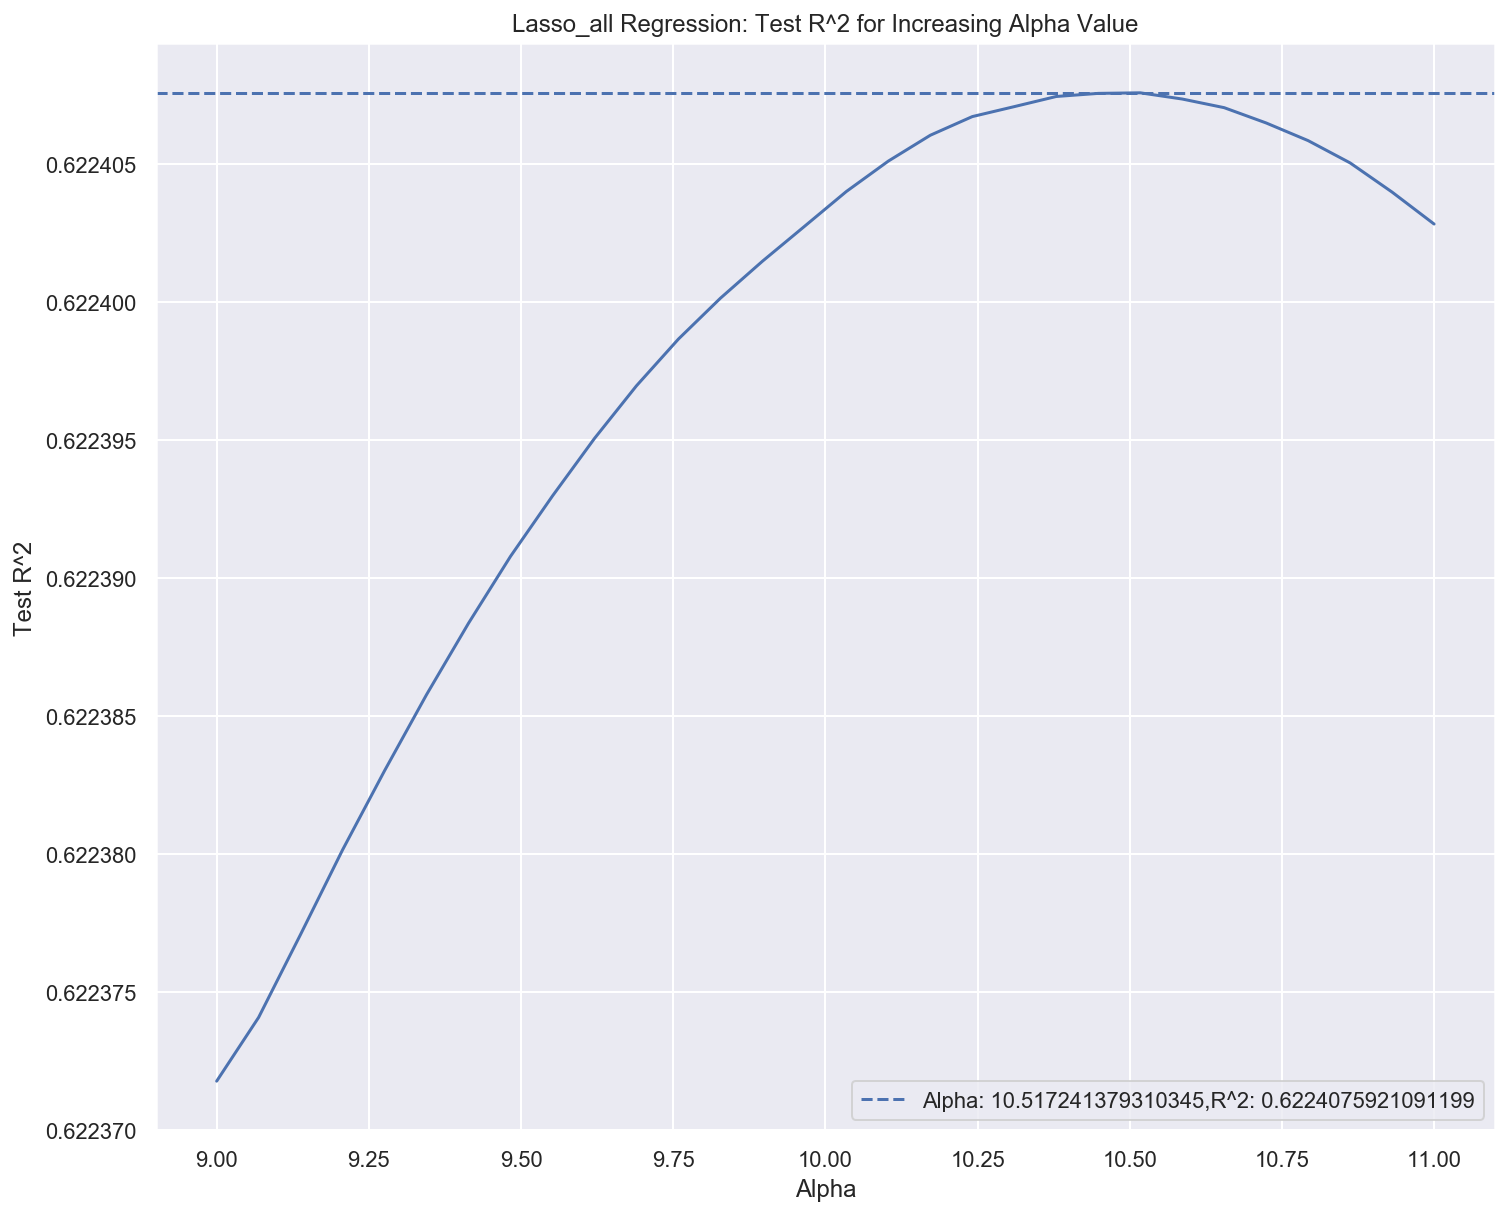

In [32]:
optimal_alpha(9,11,30,Lasso,'Lasso_all',X,Y)

In [33]:
# run the lasso regression using the optimal alpha value that we found.
all_lasso_variables,all_lasso_performance,all_lasso_outcomes = regularization(X,Y,optimal_alphas['Lasso_all'],Lasso)

Lasso lives up to it's reputation by performing well even when given all 280+ variables that led to an overfit OLS. Lasso reduces the coefficents of 104 predictors down to 0.

In [34]:
# variables that the Lasso regression discarded 
lasso_removed = all_lasso_variables[all_lasso_variables['Coefficients']==0].index.tolist()
len(lasso_removed)

104

In [35]:
# R^2 values for training and test data
all_lasso_performance.index=['all_lasso']
model_comparisons = model_comparisons.append(all_lasso_performance)
model_comparisons

,Train R^2,Test R^2,AIC,BIC
all_ols,0.716832,-2.573846e+16,483.288517,2269.623445
subset_ols,0.703326,7.003341e-01,221.272217,949.499348
noMC_ols,0.435235,4.388450e-01,200.017559,866.003055
all_lasso,0.628020,6.224076e-01,516.455471,2302.790399


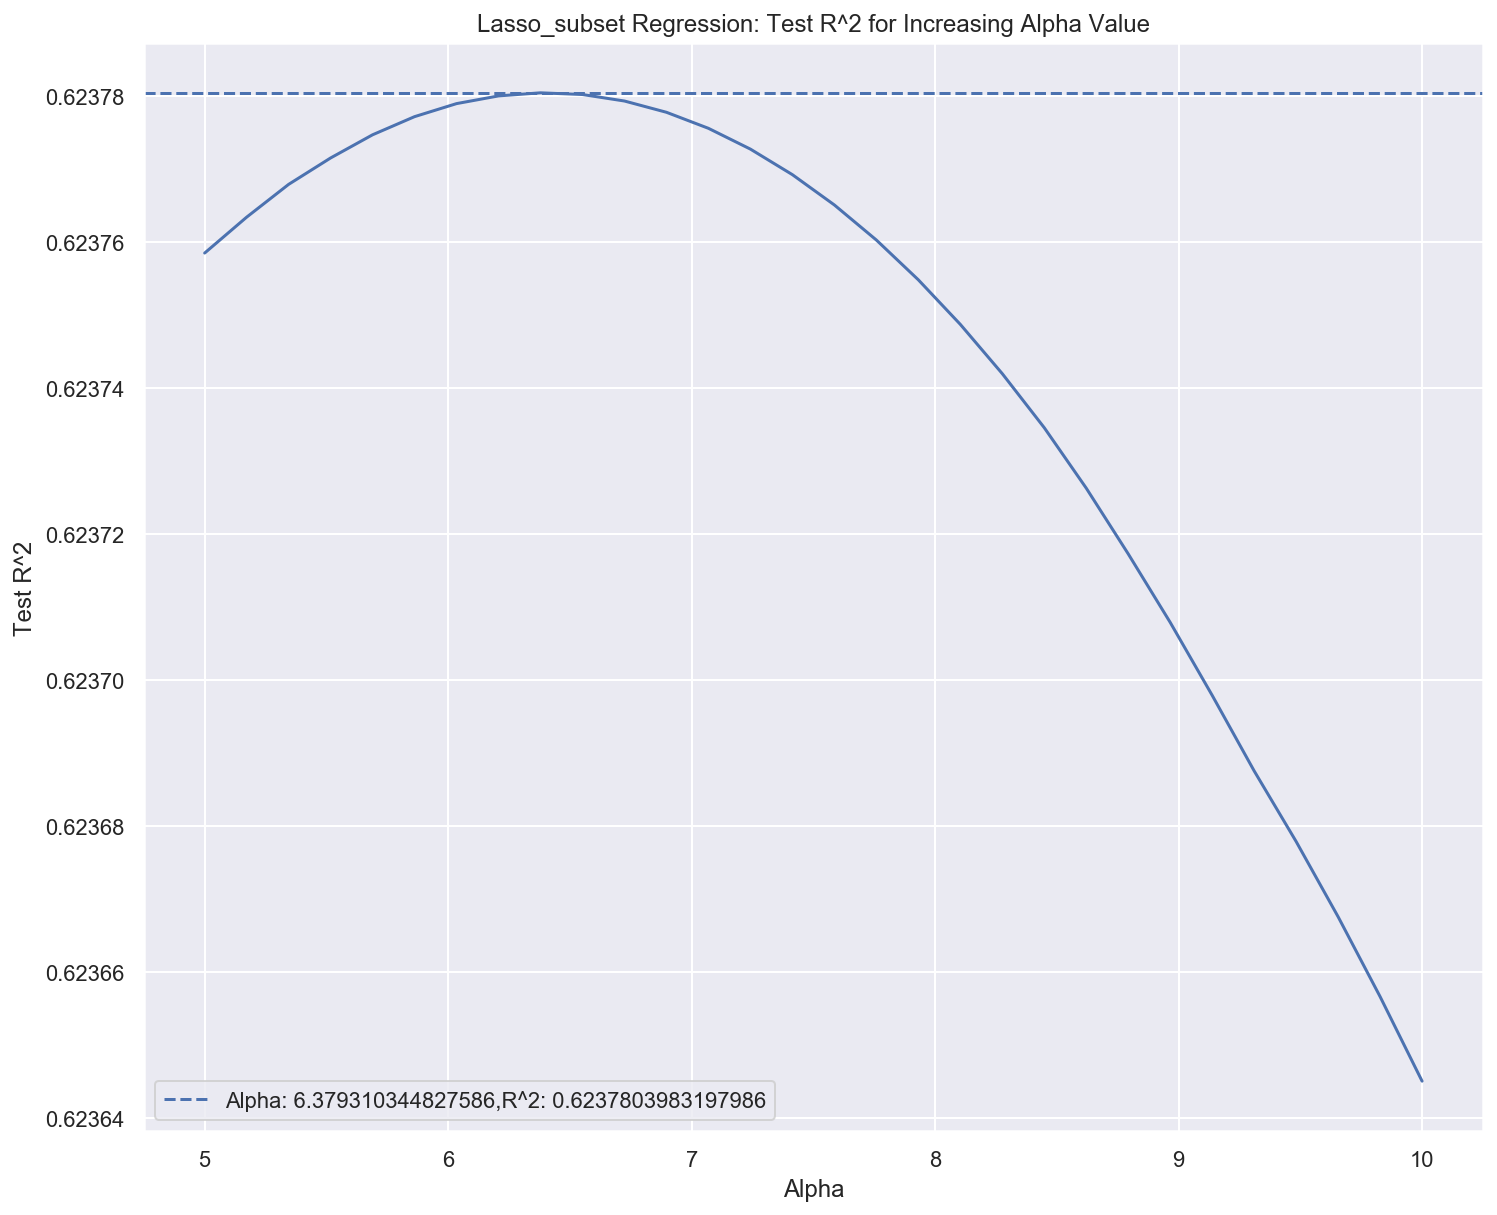

In [36]:
optimal_alpha(5,10,30,Lasso,'Lasso_subset',X_recursive,Y)

In [37]:
subset_lasso_variables,subset_lasso_performance,subset_lasso_outcomes = regularization(X_recursive,Y,optimal_alphas['Lasso_subset'],Lasso)

In [38]:
subset_lasso_performance.index=['subset_lasso']
model_comparisons = model_comparisons.append(subset_lasso_performance)
model_comparisons

,Train R^2,Test R^2,AIC,BIC
all_ols,0.716832,-2.573846e+16,483.288517,2269.623445
subset_ols,0.703326,7.003341e-01,221.272217,949.499348
noMC_ols,0.435235,4.388450e-01,200.017559,866.003055
all_lasso,0.628020,6.224076e-01,516.455471,2302.790399
subset_lasso,0.623180,6.237804e-01,176.462756,904.689887


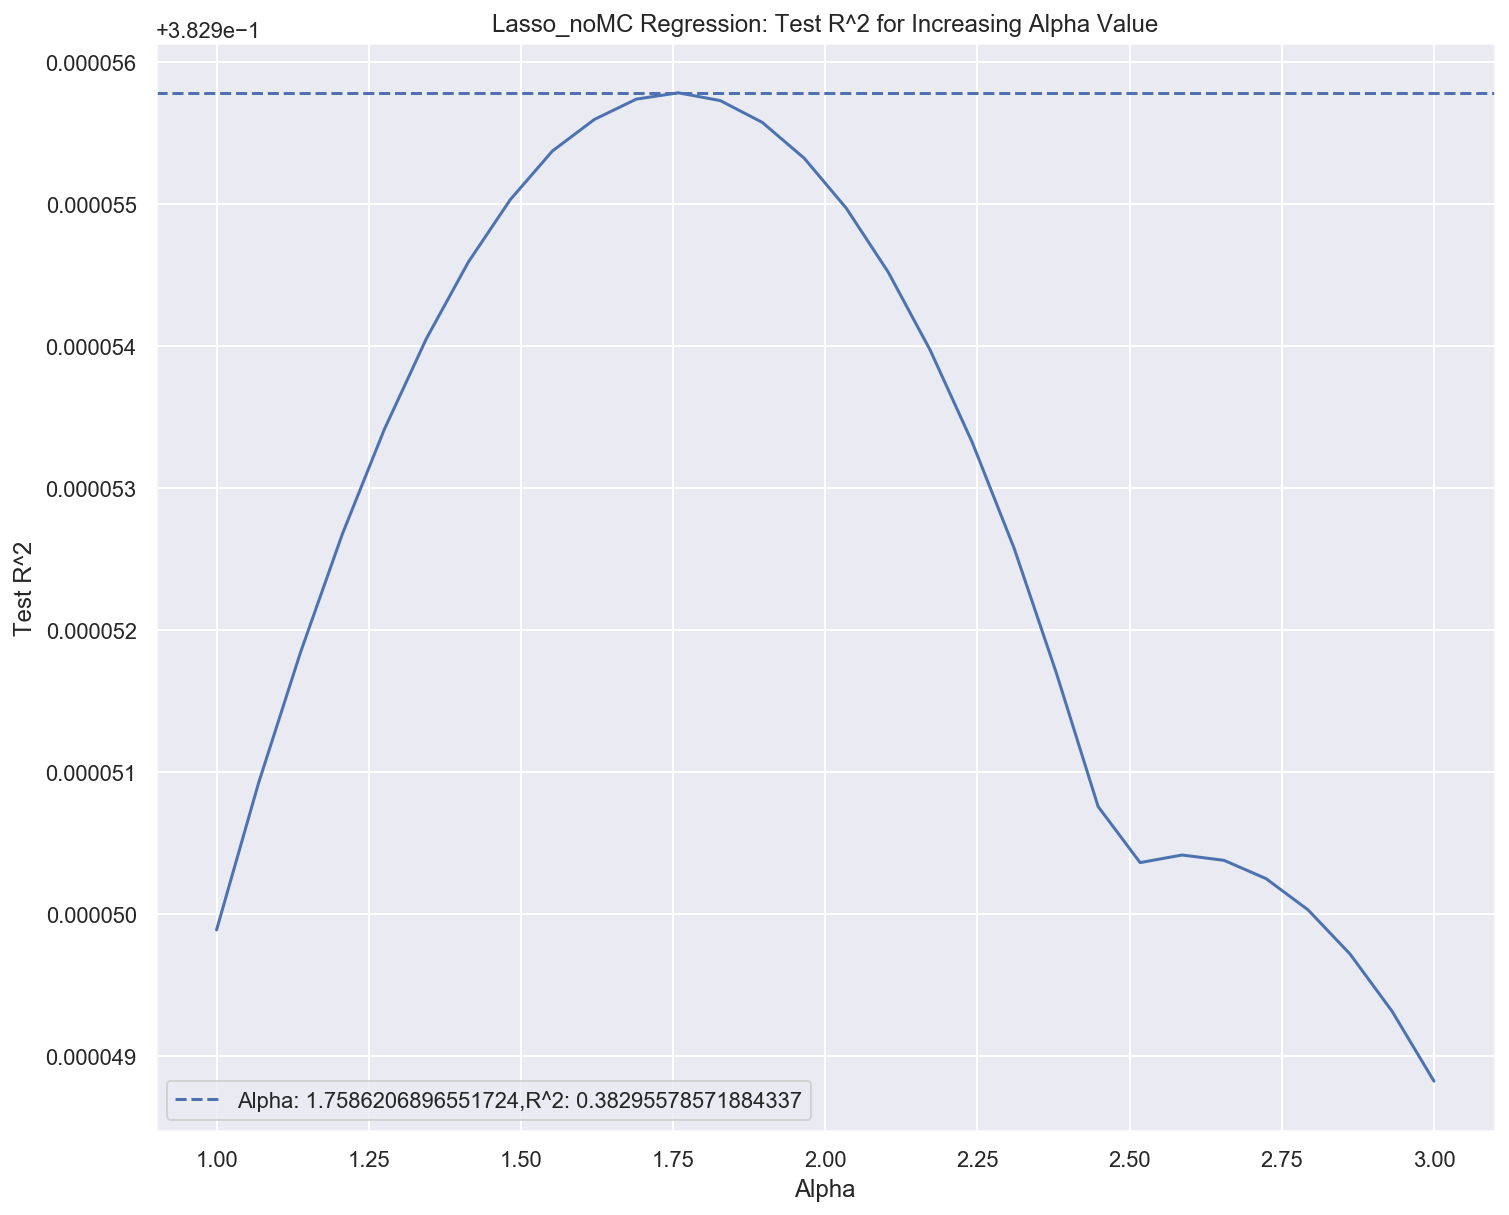

In [39]:
optimal_alpha(1,3,30,Lasso,'Lasso_noMC',X[x_keep],Y)

In [40]:
noMC_lasso_variables,noMC_lasso_performance,noMC_lasso_outcomes = (
    regularization(X[x_keep],Y,optimal_alphas['Lasso_noMC'],Lasso)
)


In [41]:
noMC_lasso_performance.index=['noMC_lasso']
model_comparisons = model_comparisons.append(noMC_lasso_performance)
model_comparisons

,Train R^2,Test R^2,AIC,BIC
all_ols,0.716832,-2.573846e+16,483.288517,2269.623445
subset_ols,0.703326,7.003341e-01,221.272217,949.499348
noMC_ols,0.435235,4.388450e-01,200.017559,866.003055
all_lasso,0.628020,6.224076e-01,516.455471,2302.790399
subset_lasso,0.623180,6.237804e-01,176.462756,904.689887
noMC_lasso,0.372412,3.829558e-01,155.473220,821.458716


Lasso did well enough on our original set of predictors, but it suffered compared to OLS when working with a subset of predictors. Now we move on to Ridge regression.

### Ridge

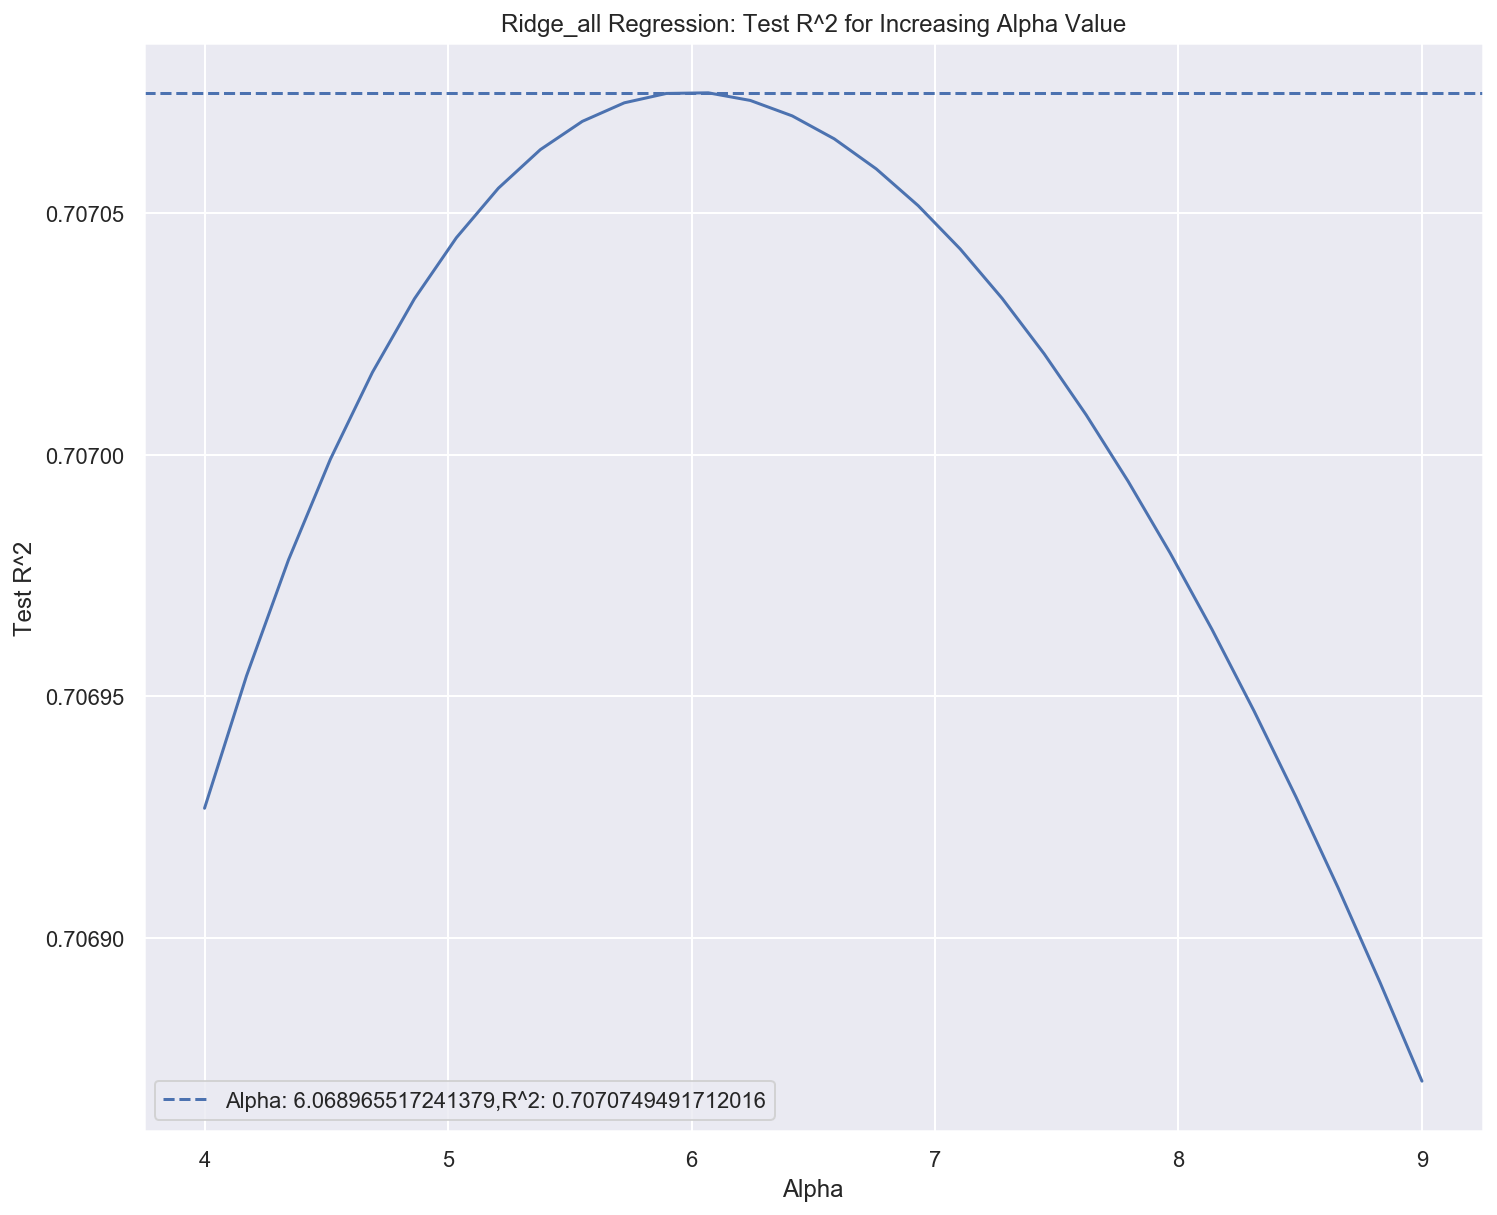

In [42]:
optimal_alpha(4,9,30,Ridge,'Ridge_all',X,np.log(Y))

In [43]:
all_ridge_variables,all_ridge_performance,all_ridge_outcomes = (
    regularization(X,np.log(Y),optimal_alphas['Ridge_all'],Ridge)
)

In [44]:
all_ridge_performance.index=['all_ridge']
model_comparisons = model_comparisons.append(all_ridge_performance)
model_comparisons

,Train R^2,Test R^2,AIC,BIC
all_ols,0.716832,-2.573846e+16,483.288517,2269.623445
subset_ols,0.703326,7.003341e-01,221.272217,949.499348
noMC_ols,0.435235,4.388450e-01,200.017559,866.003055
all_lasso,0.628020,6.224076e-01,516.455471,2302.790399
subset_lasso,0.623180,6.237804e-01,176.462756,904.689887
noMC_lasso,0.372412,3.829558e-01,155.473220,821.458716
all_ridge,0.713653,7.070749e-01,561.317720,2347.652648


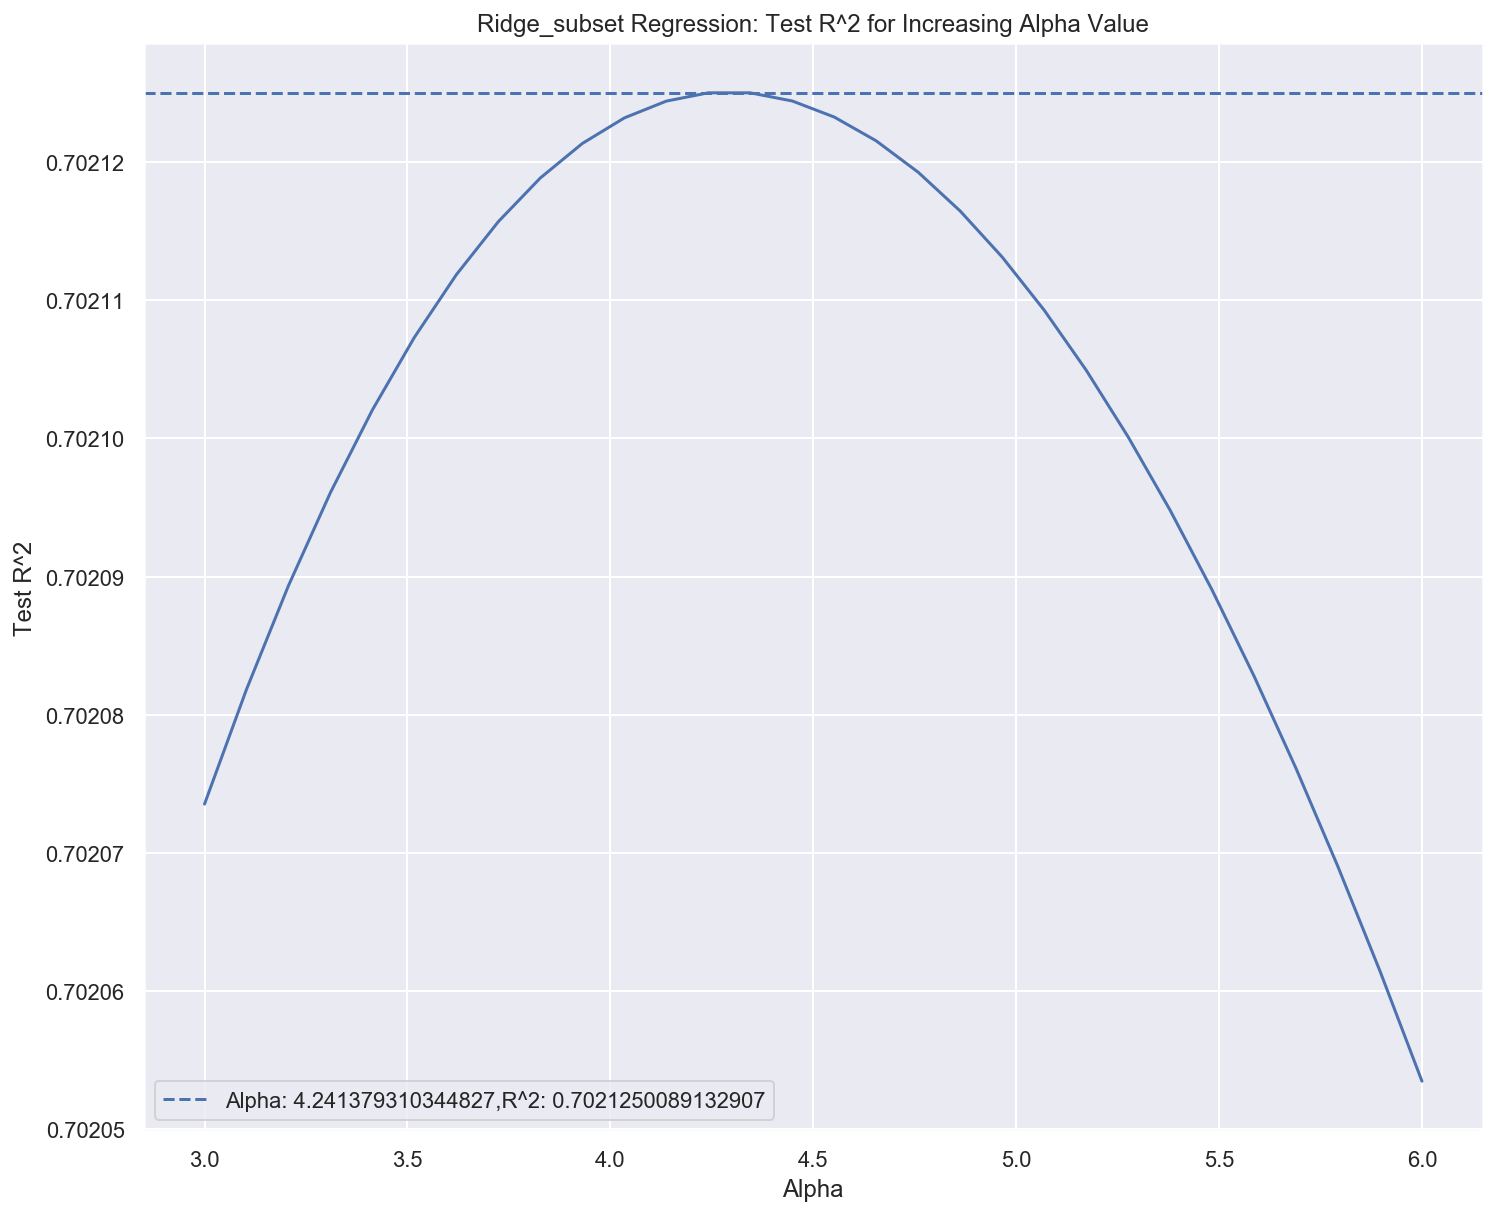

In [45]:
optimal_alpha(3,6,30,Ridge,'Ridge_subset',X_recursive,np.log(Y))

In [46]:
subset_ridge_variables,subset_ridge_performance,subset_ridge_outcomes = (
    regularization(X_recursive,np.log(Y),optimal_alphas['Ridge_subset'],Ridge)
)

In [47]:
subset_ridge_performance.index=['subset_ridge']
model_comparisons=model_comparisons.append(subset_ridge_performance)
model_comparisons

,Train R^2,Test R^2,AIC,BIC
all_ols,0.716832,-2.573846e+16,483.288517,2269.623445
subset_ols,0.703326,7.003341e-01,221.272217,949.499348
noMC_ols,0.435235,4.388450e-01,200.017559,866.003055
all_lasso,0.628020,6.224076e-01,516.455471,2302.790399
subset_lasso,0.623180,6.237804e-01,176.462756,904.689887
noMC_lasso,0.372412,3.829558e-01,155.473220,821.458716
all_ridge,0.713653,7.070749e-01,561.317720,2347.652648
subset_ridge,0.703011,7.021250e-01,221.284206,949.511337


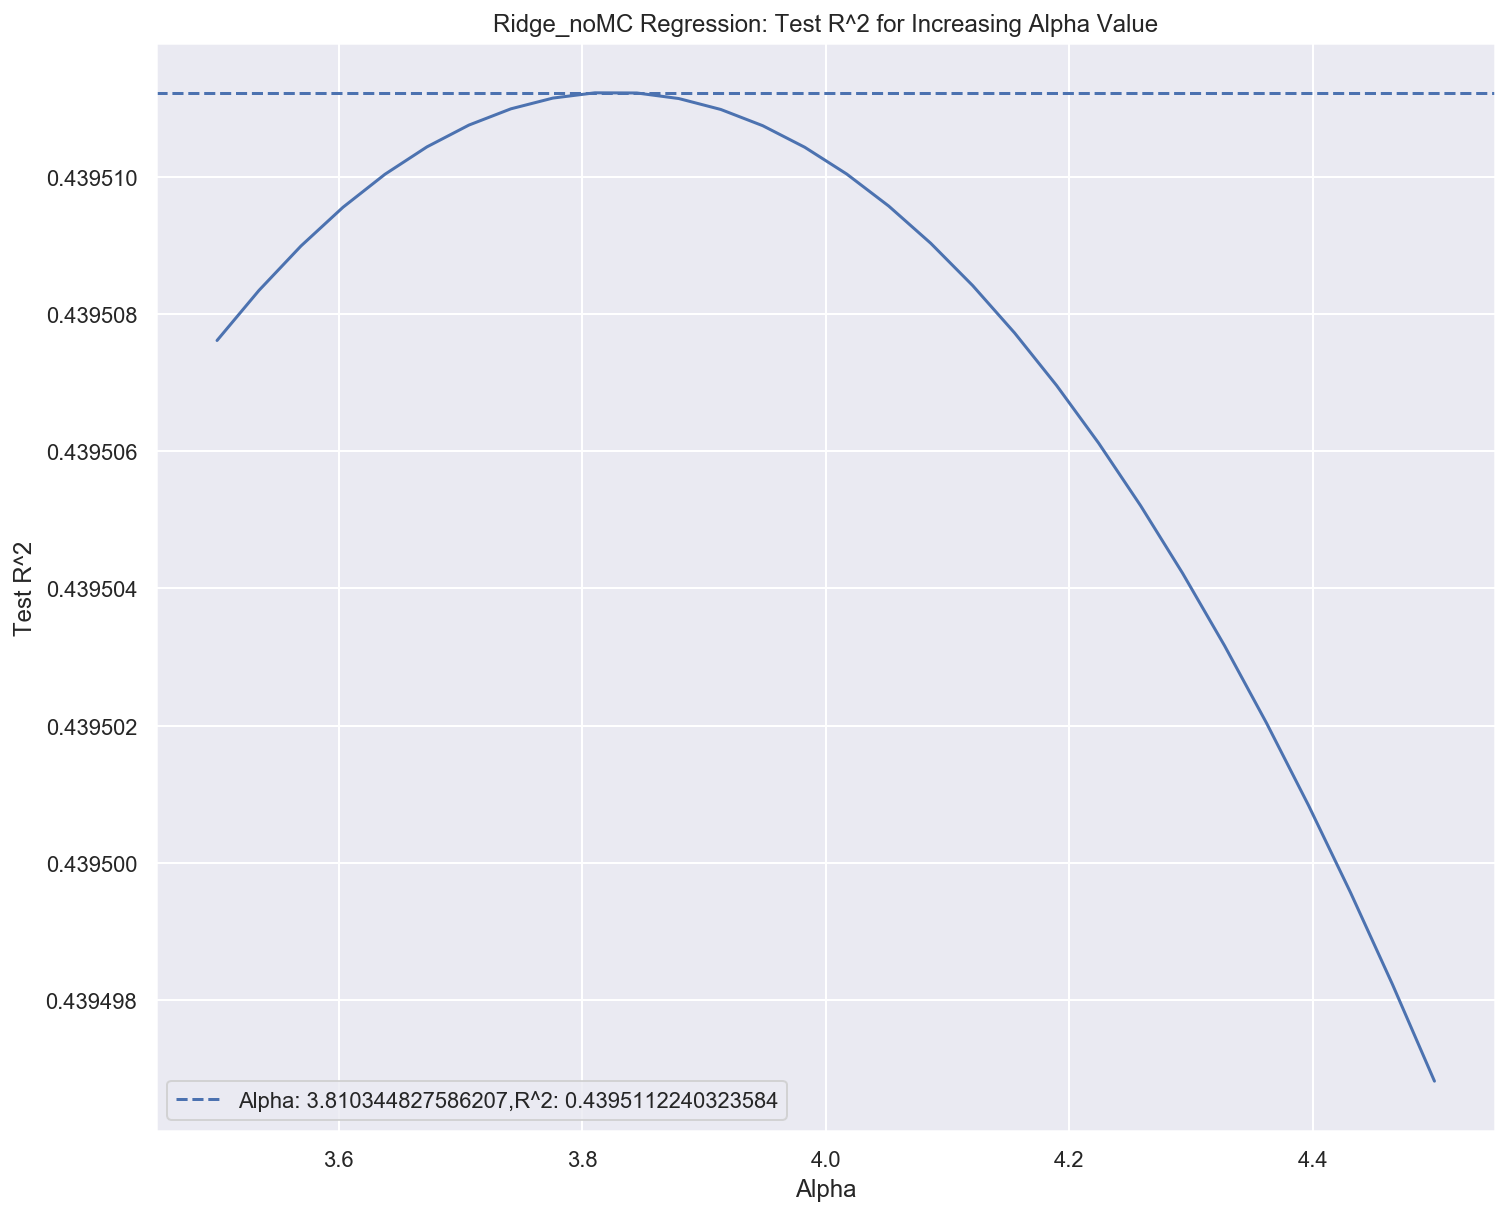

In [69]:
optimal_alpha(3.5,4.5,30,Ridge,'Ridge_noMC',X[x_keep],np.log(Y))

In [49]:
noMC_ridge_variables,noMC_ridge_performance,noMC_ridge_outcomes = (
    regularization(X[x_keep],np.log(Y),optimal_alphas['Ridge_noMC'],Ridge)
)

In [50]:
noMC_ridge_performance.index=['noMC_ridge']
model_comparisons=model_comparisons.append(noMC_ridge_performance)
model_comparisons

,Train R^2,Test R^2,AIC,BIC
all_ols,0.716832,-2.573846e+16,483.288517,2269.623445
subset_ols,0.703326,7.003341e-01,221.272217,949.499348
noMC_ols,0.435235,4.388450e-01,200.017559,866.003055
all_lasso,0.628020,6.224076e-01,516.455471,2302.790399
subset_lasso,0.623180,6.237804e-01,176.462756,904.689887
noMC_lasso,0.372412,3.829558e-01,155.473220,821.458716
all_ridge,0.713653,7.070749e-01,561.317720,2347.652648
subset_ridge,0.703011,7.021250e-01,221.284206,949.511337
noMC_ridge,0.433761,4.395076e-01,200.019922,866.005418


Ridge has the highest test R^2 for each set of variables. 

# Further Analysis of Model Performance

In this section, we'll dive further into performance metrics for our ridge regressions. 

Text(0.5, 1.0, 'Observed vs Predicted Values for Ridge: All Predictors')

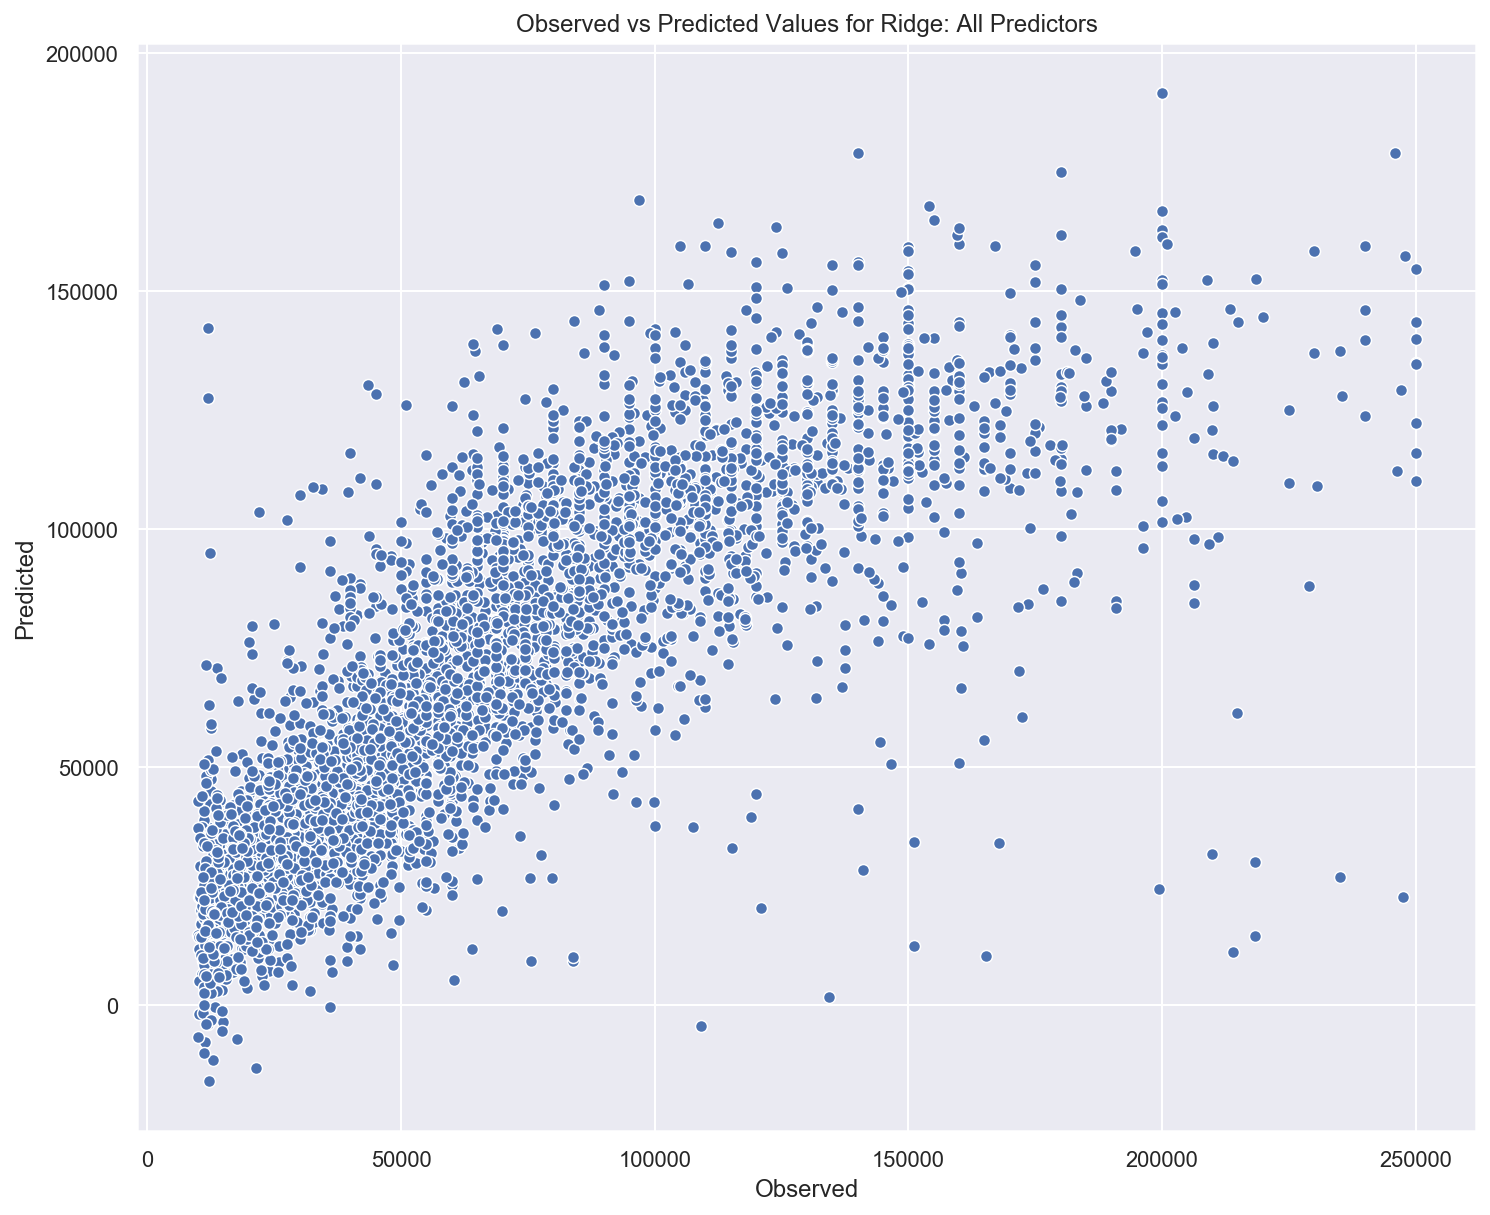

In [51]:
sns.scatterplot(x=all_lasso_outcomes['Observed'],y=all_lasso_outcomes['Predicted'])
plt.title('Observed vs Predicted Values for Ridge: All Predictors')

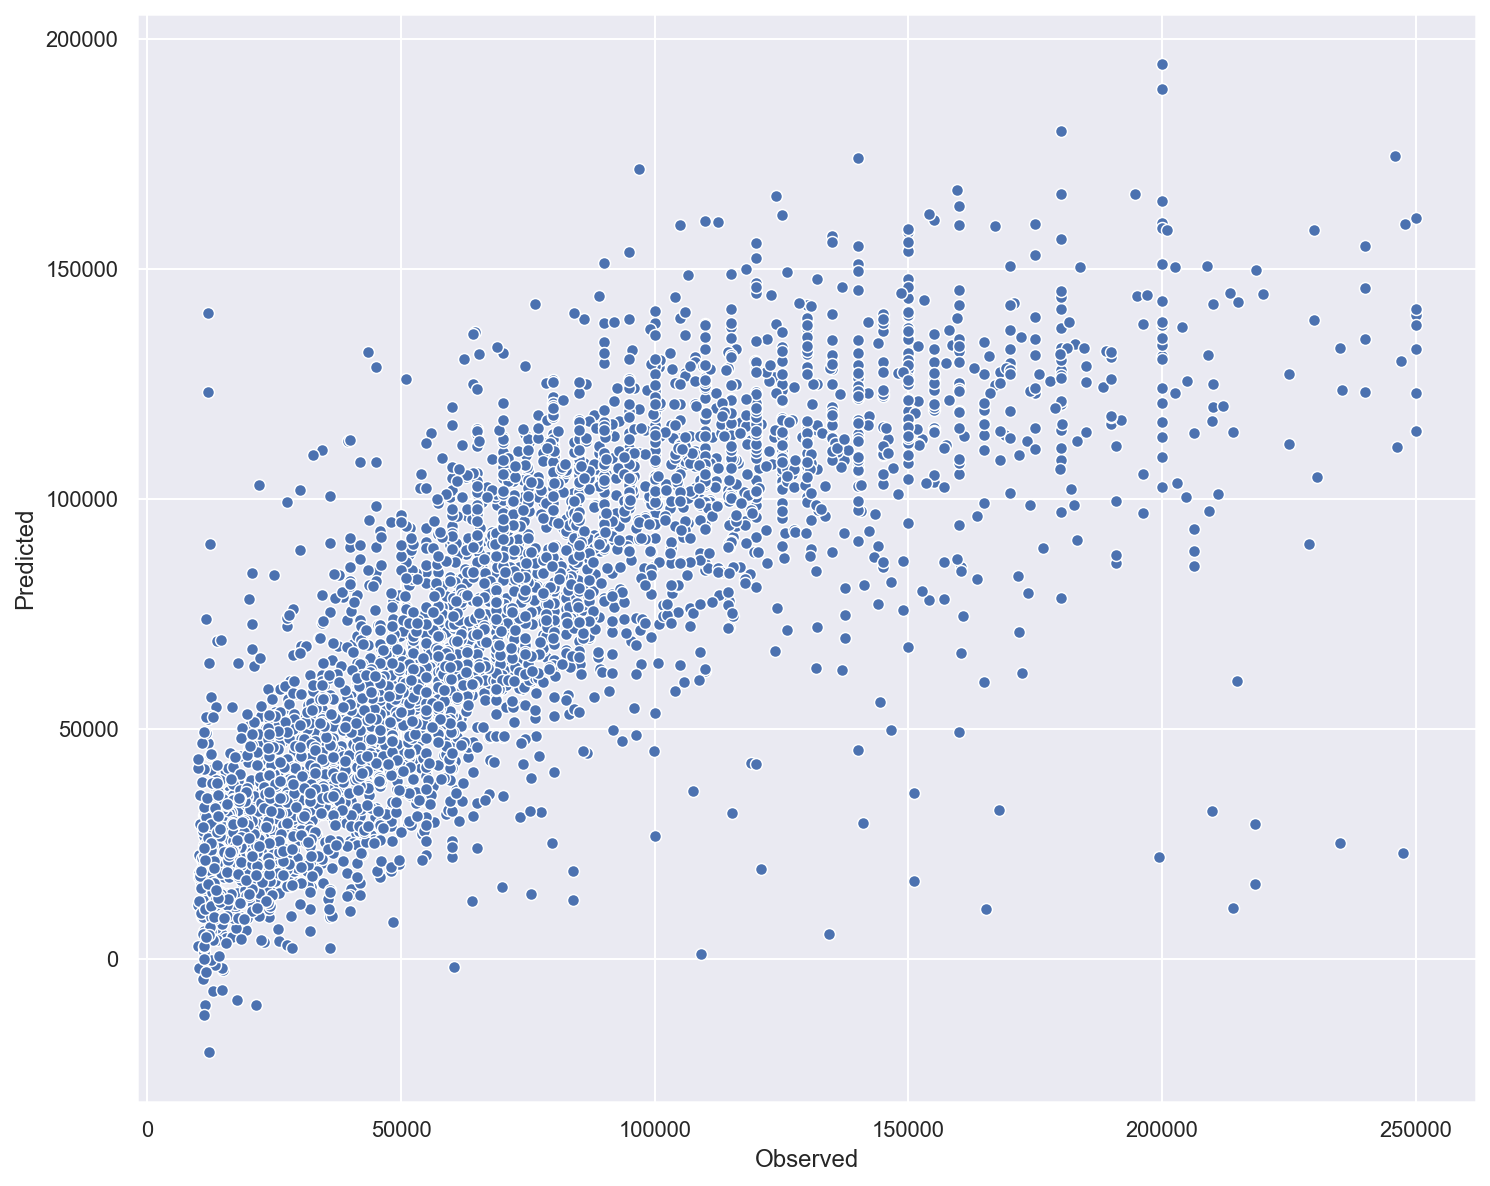

In [52]:
sns.scatterplot(x=subset_lasso_outcomes['Observed'],y=subset_lasso_outcomes['Predicted'])

Text(0.5, 1.0, 'Ridge Regression: Predicted vs Actual Outcomes')

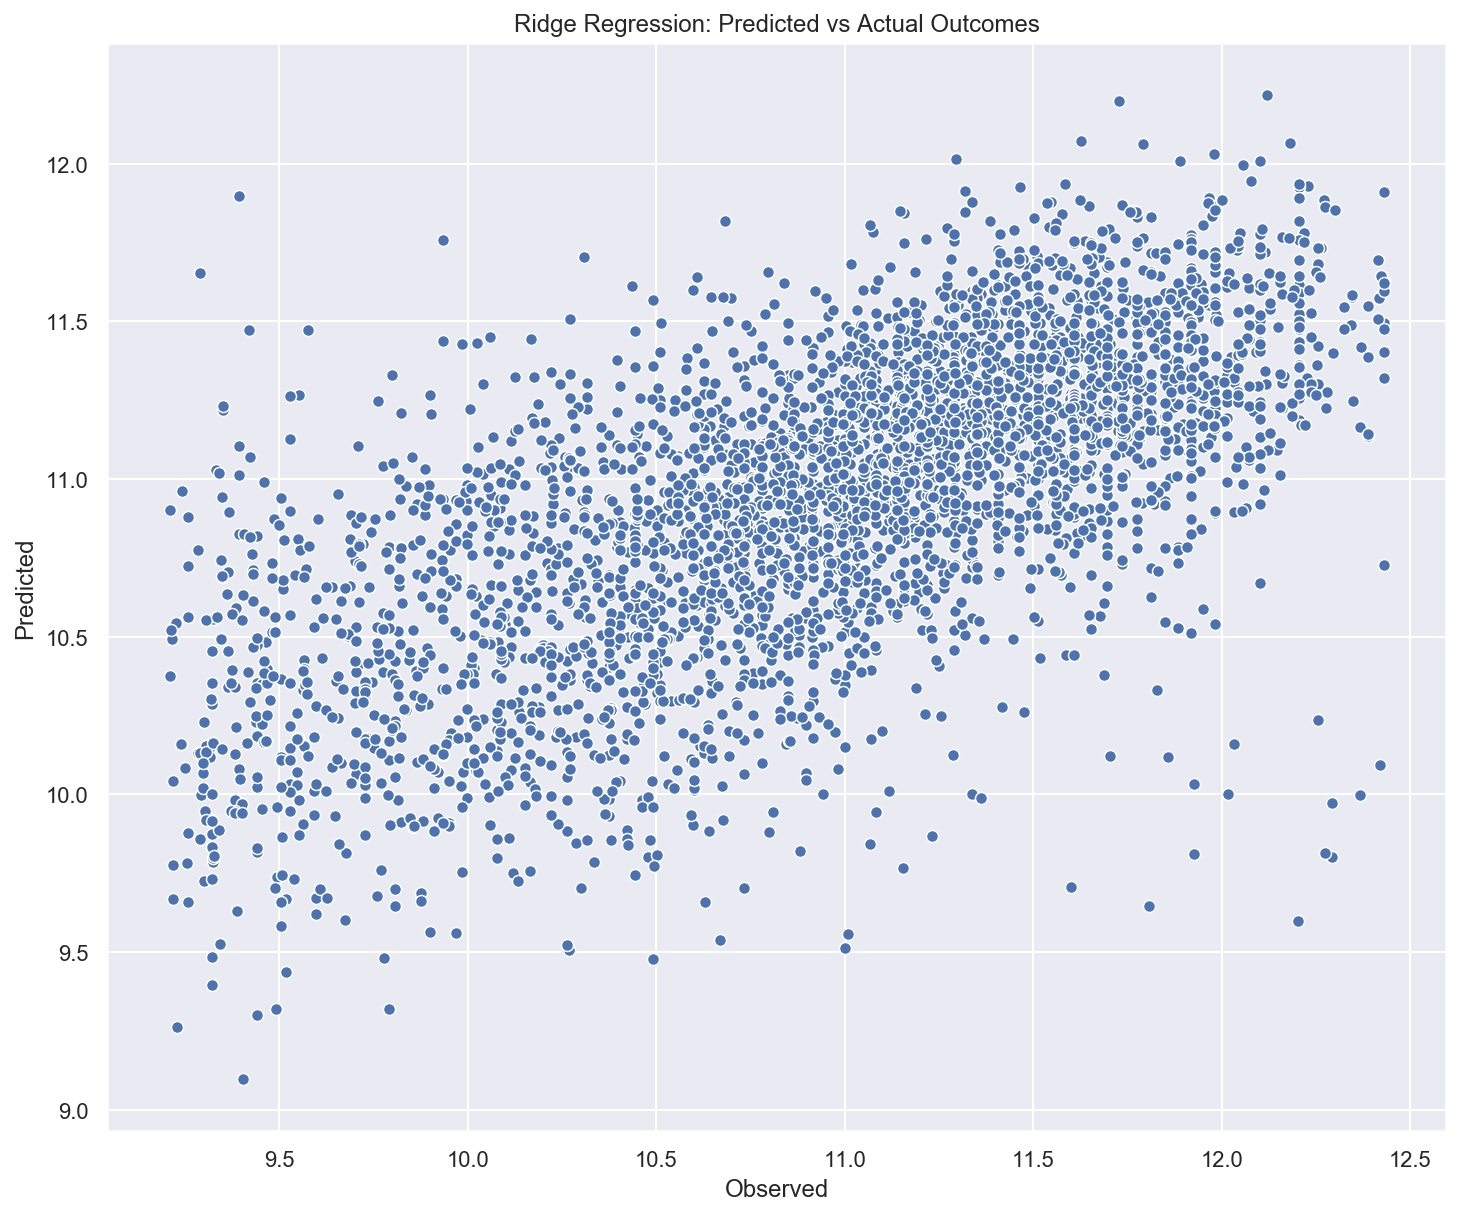

In [63]:
sns.scatterplot(x=noMC_ridge_outcomes['Observed'],y=noMC_ridge_outcomes['Predicted'])
plt.title('Ridge Regression: Predicted vs Actual Outcomes')

In [54]:
def QQplot(outcomes,title):
    
    z= (outcomes['Residuals']-outcomes['Residuals'].mean())/np.std(outcomes['Residuals'])
    stats.probplot(z, dist="norm", plot=plt)
    
    plt.title(title)
    plt.show()

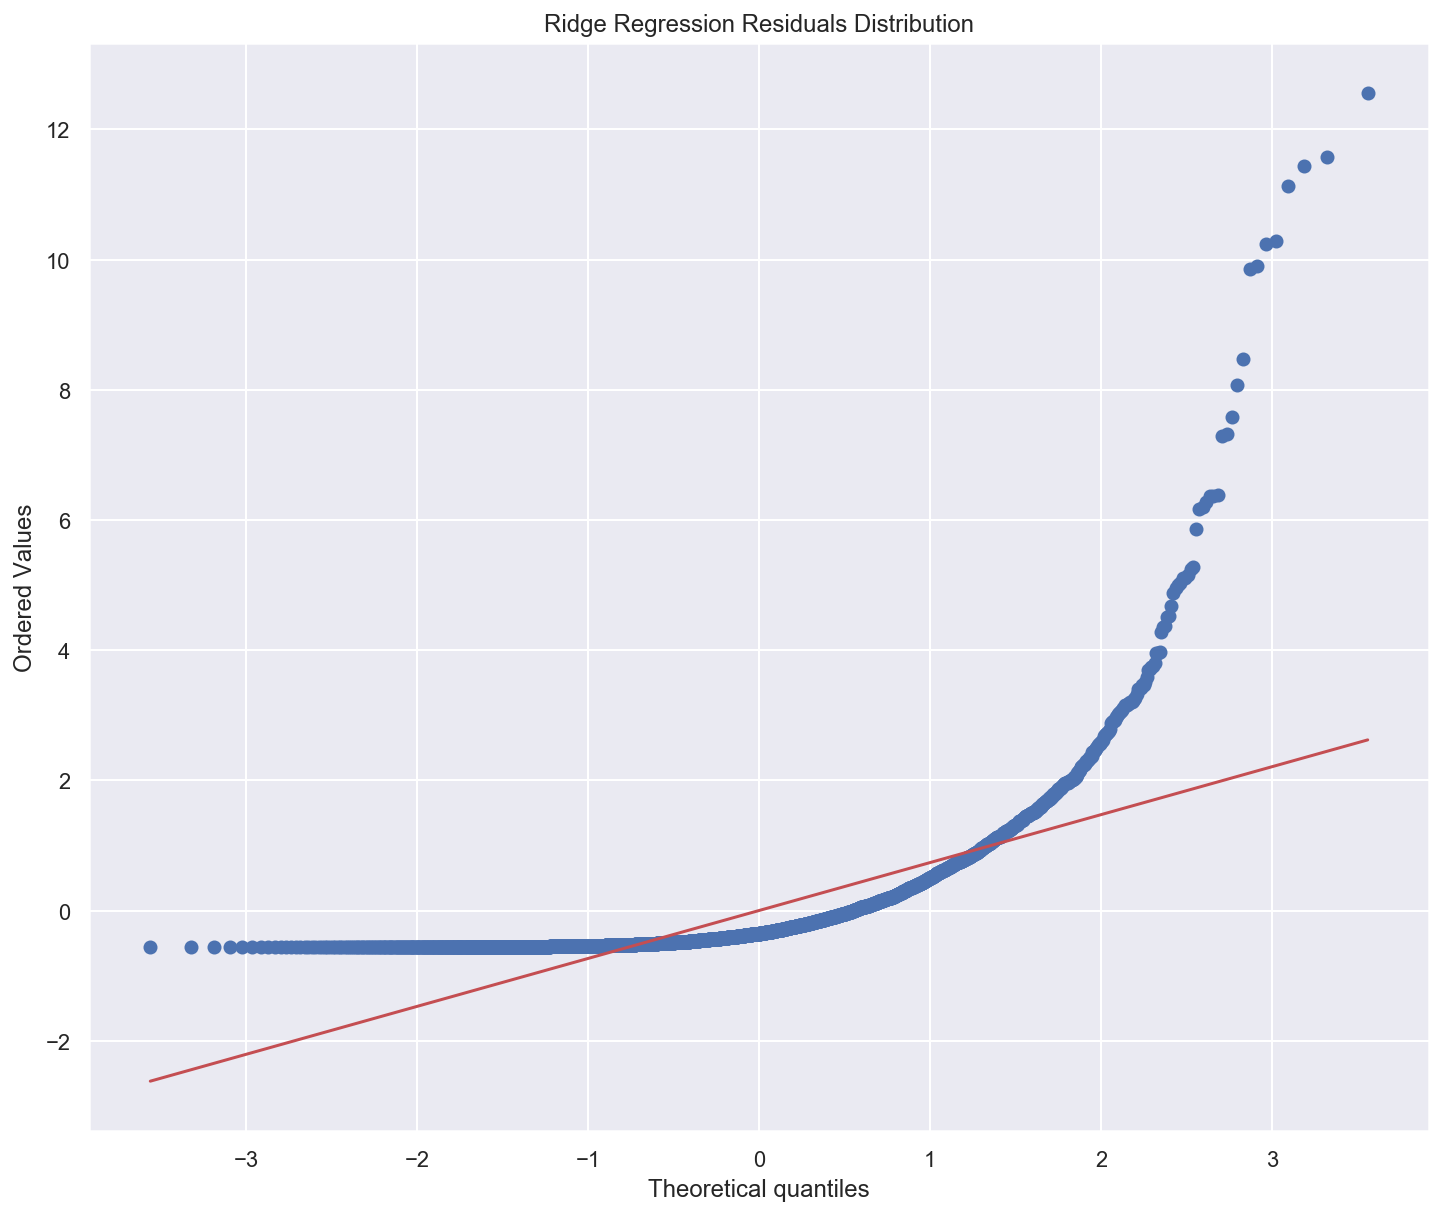

In [64]:
QQplot(noMC_ridge_outcomes,"Ridge Regression Residuals Distribution")

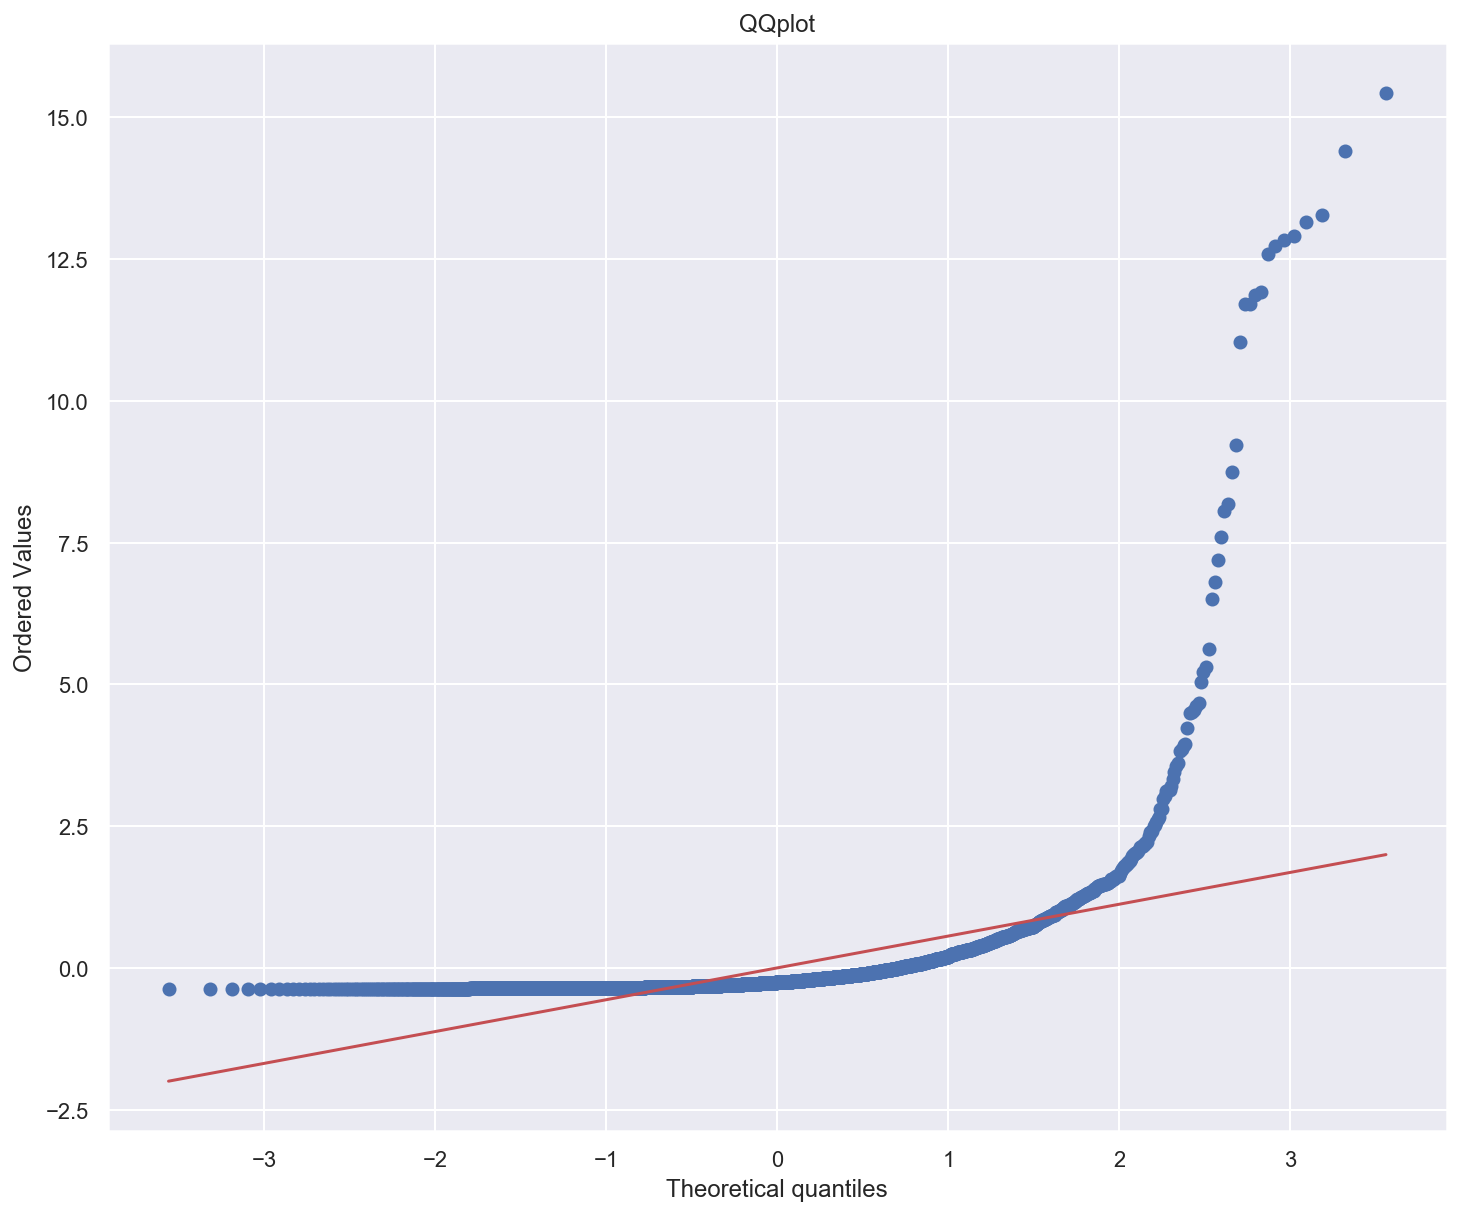

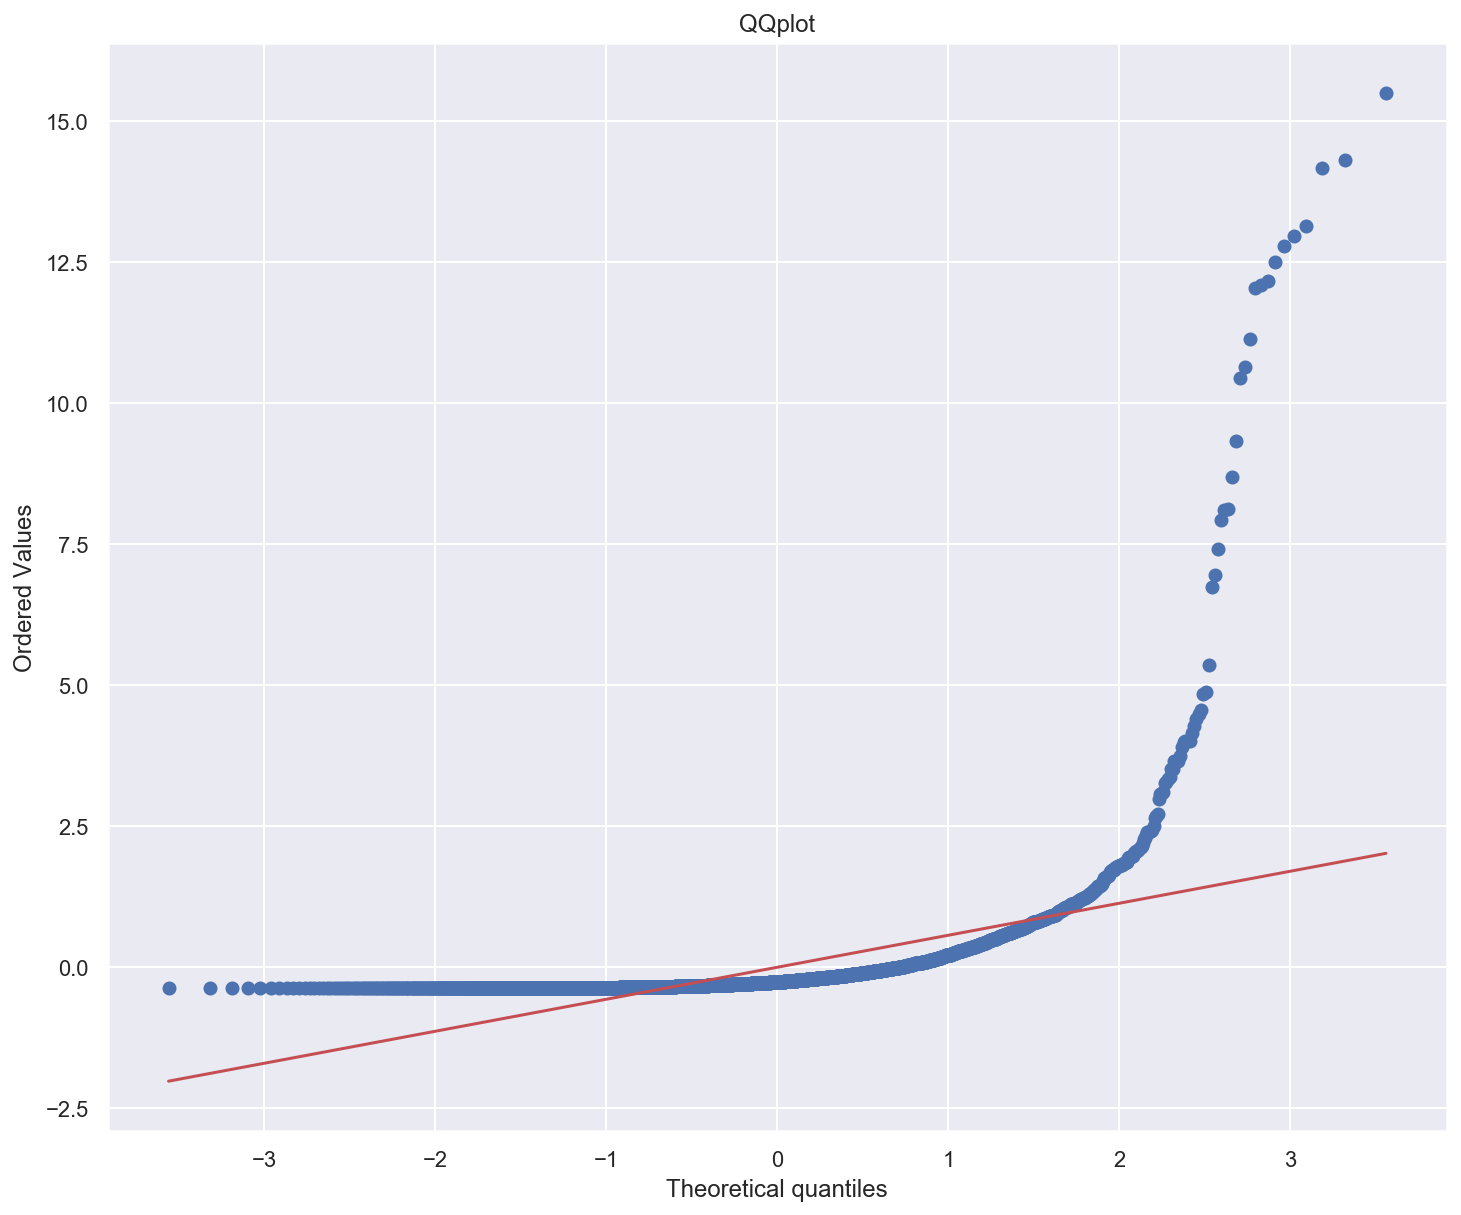

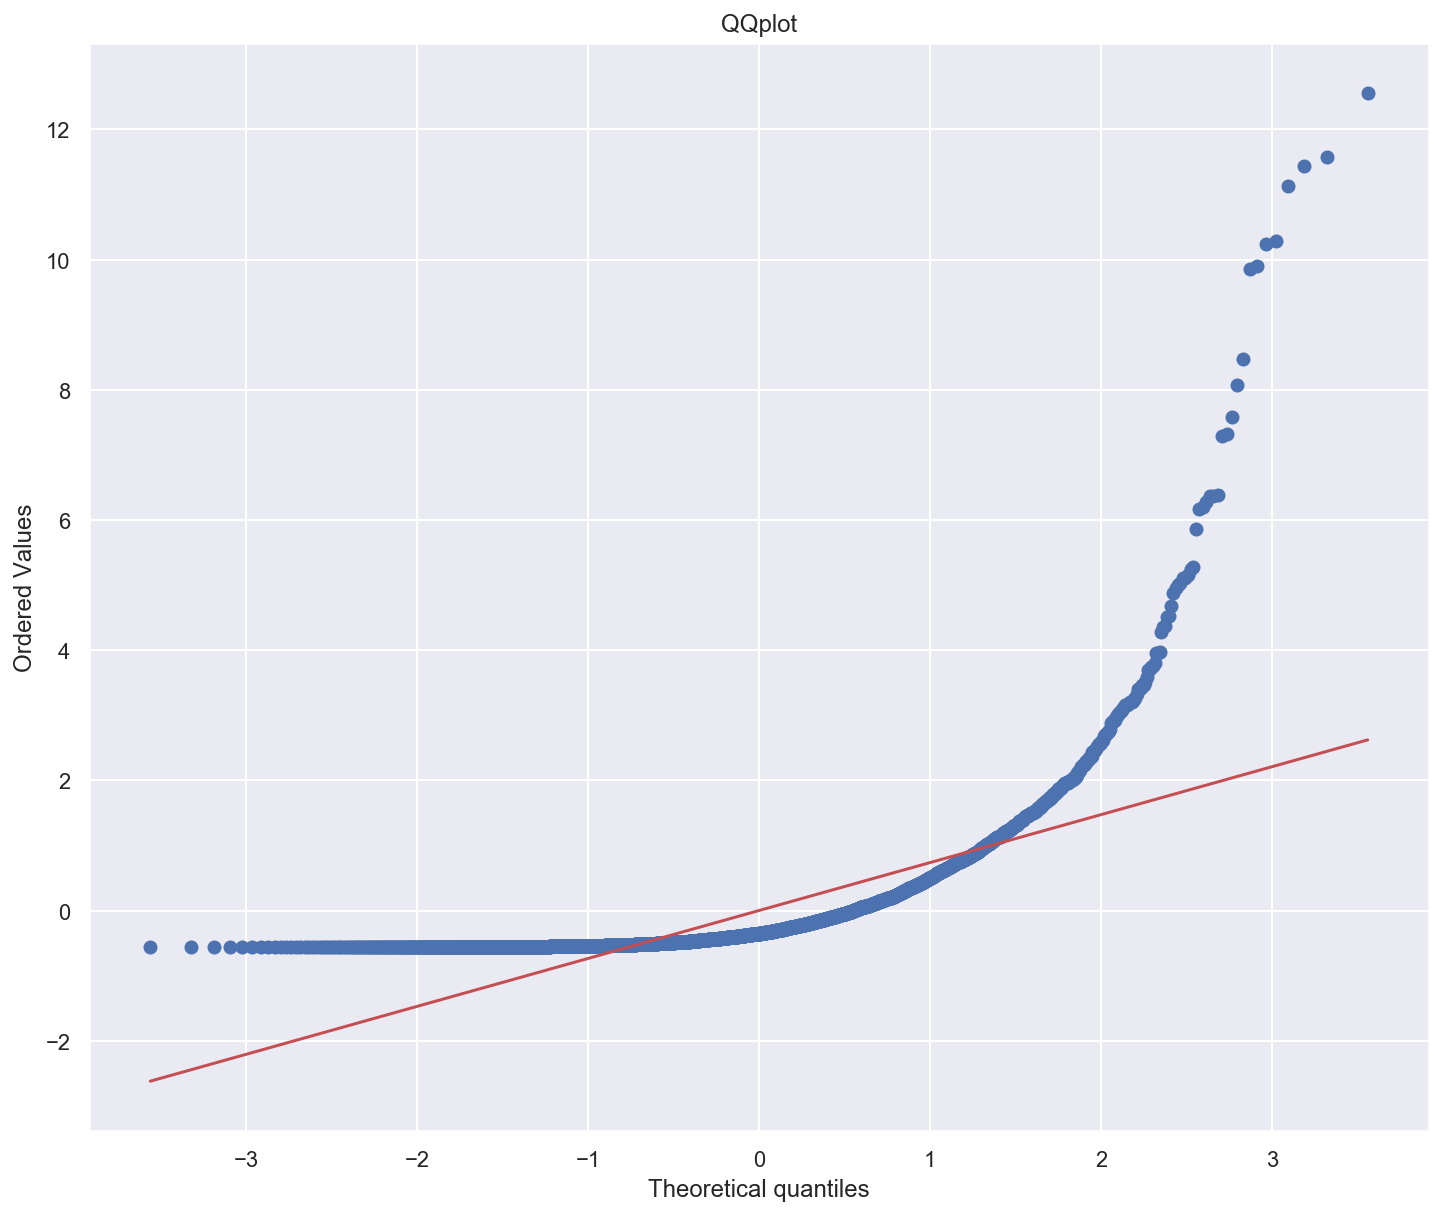

In [55]:
# ridge_outcomes = [all_ridge_outcomes,subset_ridge_outcomes,noMC_ridge_outcomes]

# for outcomes in ridge_outcomes:
#     QQplot(outcomes,'QQplot')

### Which coefficients are most important to the relationship between our predictors and our outcome variable? 

Example: the coefficient is 0.198. (exp(0.198) – 1) * 100 = 21.9. For every one-unit increase in the independent variable, our dependent variable increases by about 22%.

In [80]:
(np.exp(0.769417)-1)*100

115.85074770280369

In [82]:
noMC_ridge_variables.sort_values('Coefficients',ascending=False).head(25)
noMC_ridge_variables['Influence']= round((np.exp(noMC_ridge_variables['Coefficients'])-1)*100,2)

In [83]:
noMC_ridge_variables.sort_values('Coefficients',ascending=False).head(25)

,Coefficients,Influence
Intercept,10.021382,2250149.92
WorkWeekHrs,0.769417,115.85
Country_United Republic of Tanzania,0.491863,63.54
Country_Libyan Arab Jamahiriya,0.428340,53.47
Country_Somalia,0.404245,49.82
Country_Switzerland,0.391148,47.87
White or of European descent,0.363154,43.79
Country_Israel,0.313580,36.83
"OrgSize_10,000 or more employees",0.232341,26.16
Country_Swaziland,0.228973,25.73


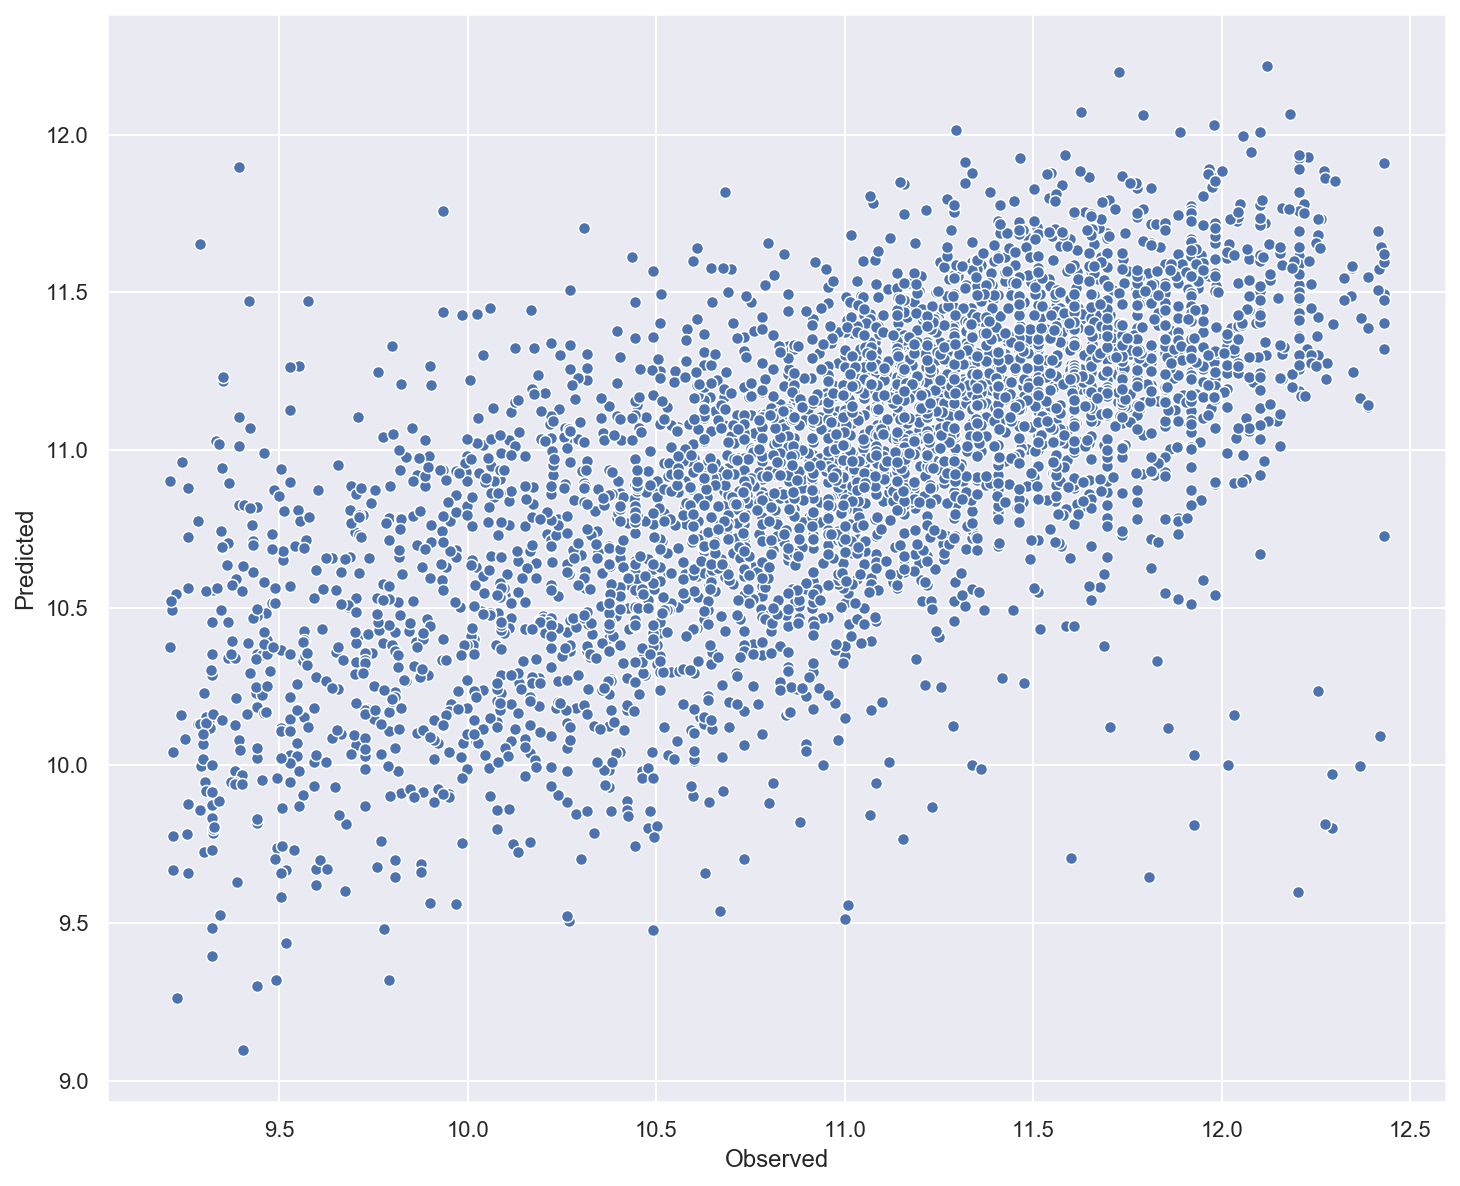

In [58]:
sns.scatterplot(x=noMC_ridge_outcomes['Observed'],y=noMC_ridge_outcomes['Predicted'])

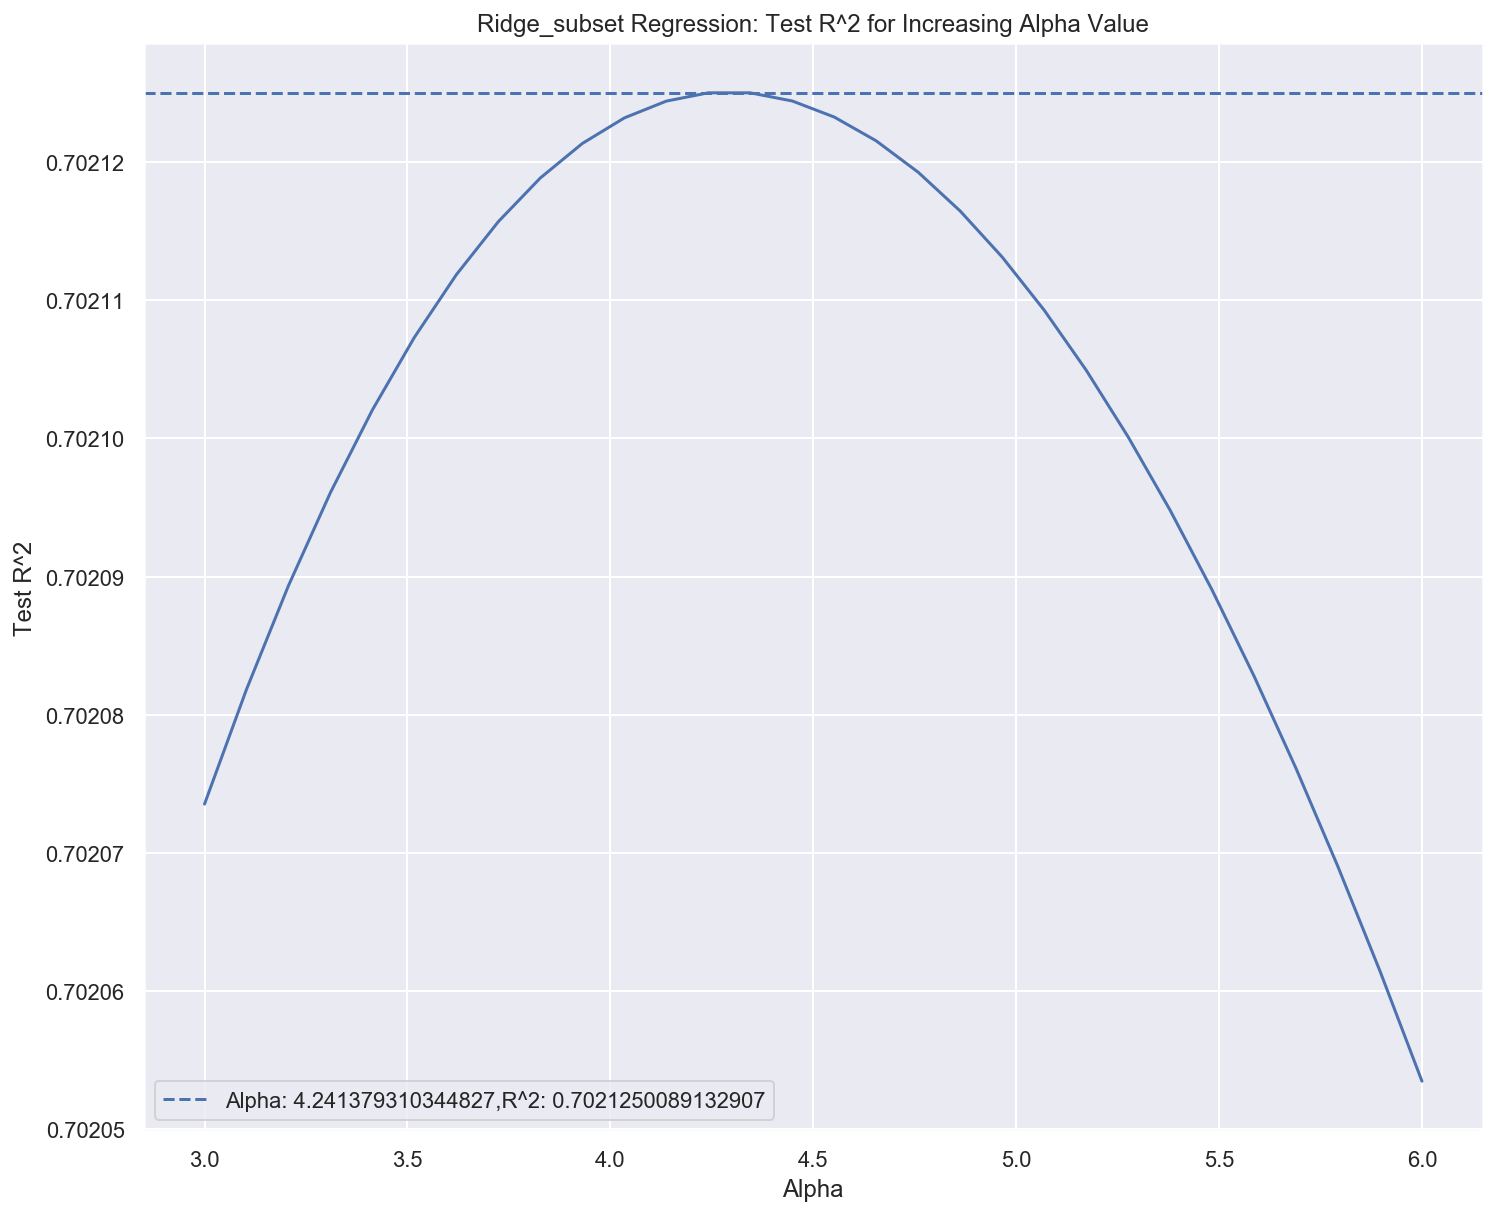

In [59]:
optimal_alpha(3,6,30,Ridge,'Ridge_subset',X_recursive,np.log(Y))

In [60]:
optimal_alphas

{'Lasso_all': 10.517241379310345,
 'Lasso_subset': 6.379310344827586,
 'Lasso_noMC': 1.7586206896551724,
 'Ridge_all': 6.068965517241379,
 'Ridge_subset': 4.241379310344827,
 'Ridge_noMC': 3.5}

### Additional Investigation

In [ ]:
countries = [x for x in X[x_keep].columns.tolist() if 'Country' in x]

In [ ]:
optimal_alpha(1,10,30,Ridge,'countries ridge',X[countries],Y)

In [84]:
subset_ols_outcomes

,Observed,Predicted,Residuals
67982,10.268131,10.048828,0.048094
50880,10.063052,10.183105,0.014413
15407,11.068434,11.085938,0.000306
23344,10.532096,10.515625,0.000271
21976,11.002100,10.711426,0.084491
...,...,...,...
59878,10.375489,10.454102,0.006180
3332,10.493799,10.672852,0.032060
15591,10.596635,11.097168,0.250534
35694,11.607435,10.968750,0.407919


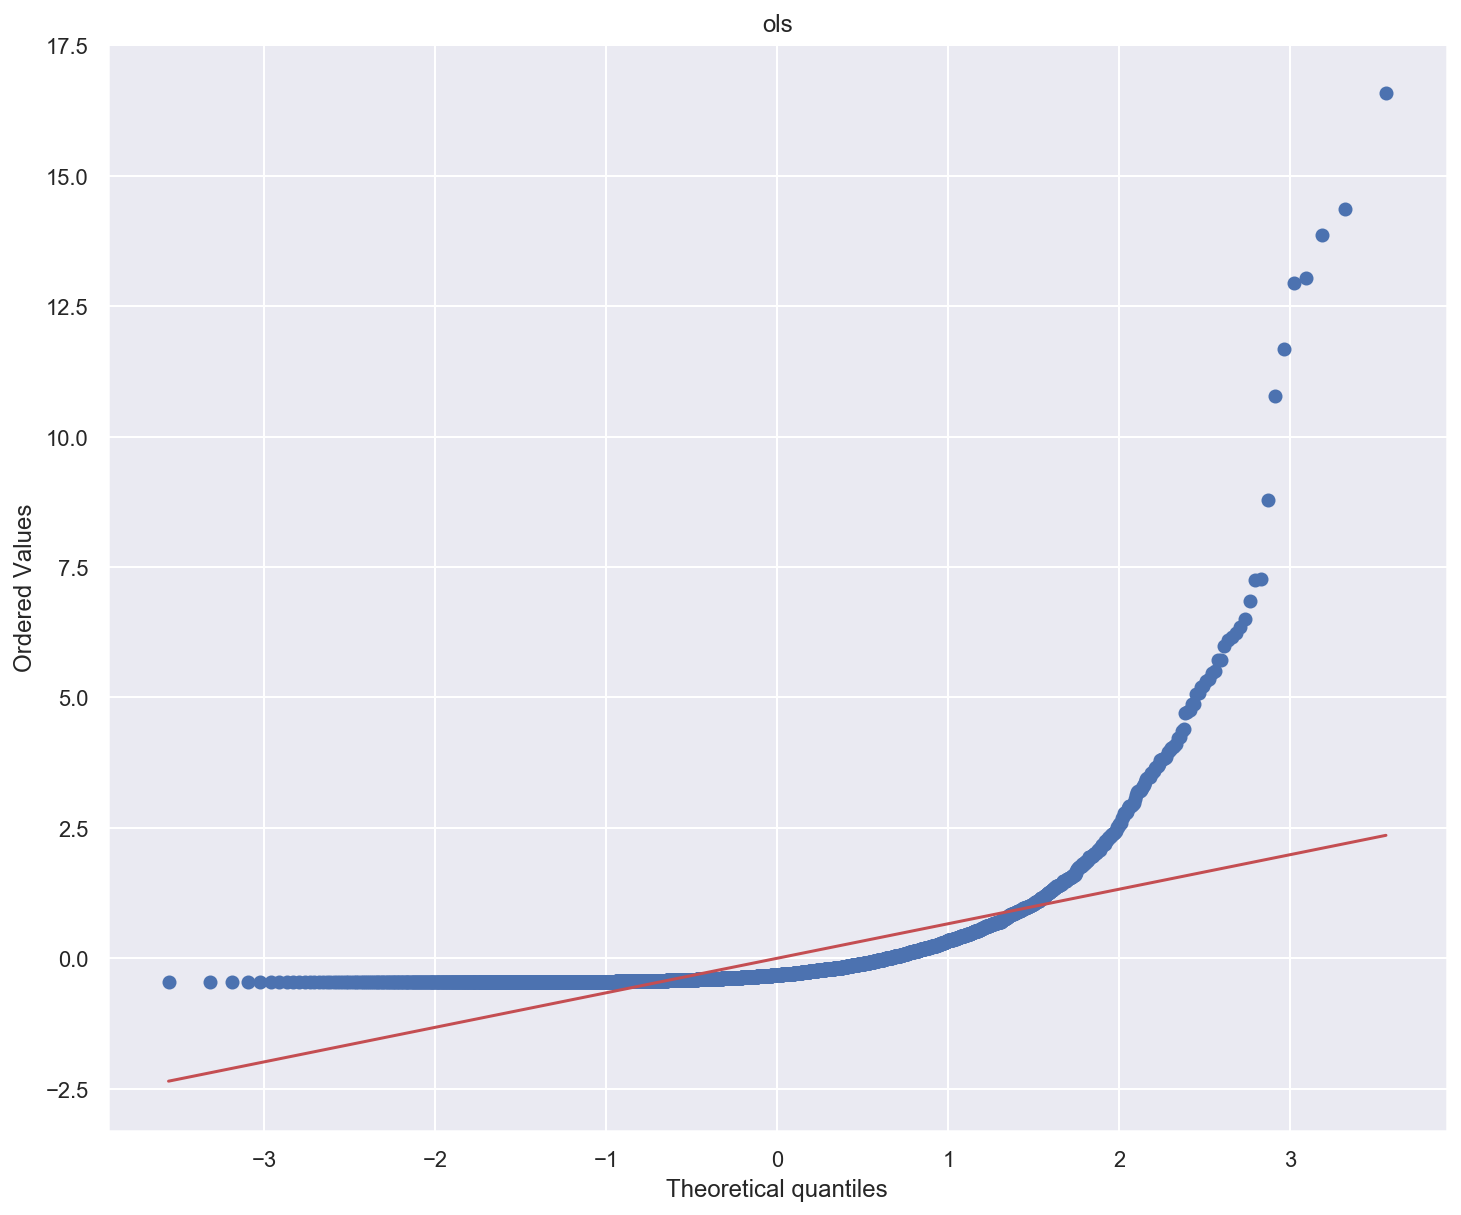

In [86]:
QQplot(noMC_lasso_outcomes,'ols')

In [90]:
SnoMC_ridge_variables,SnoMC_ridge_performance,SnoMC_ridge_outcomes = (
    regularizationStandard(X[x_keep],np.log(Y),optimal_alphas['Ridge_noMC'],Ridge)
)

In [91]:
SnoMC_ridge_performance

,Train R^2,Test R^2,AIC,BIC
0,0.435235,0.438846,200.017563,866.003059


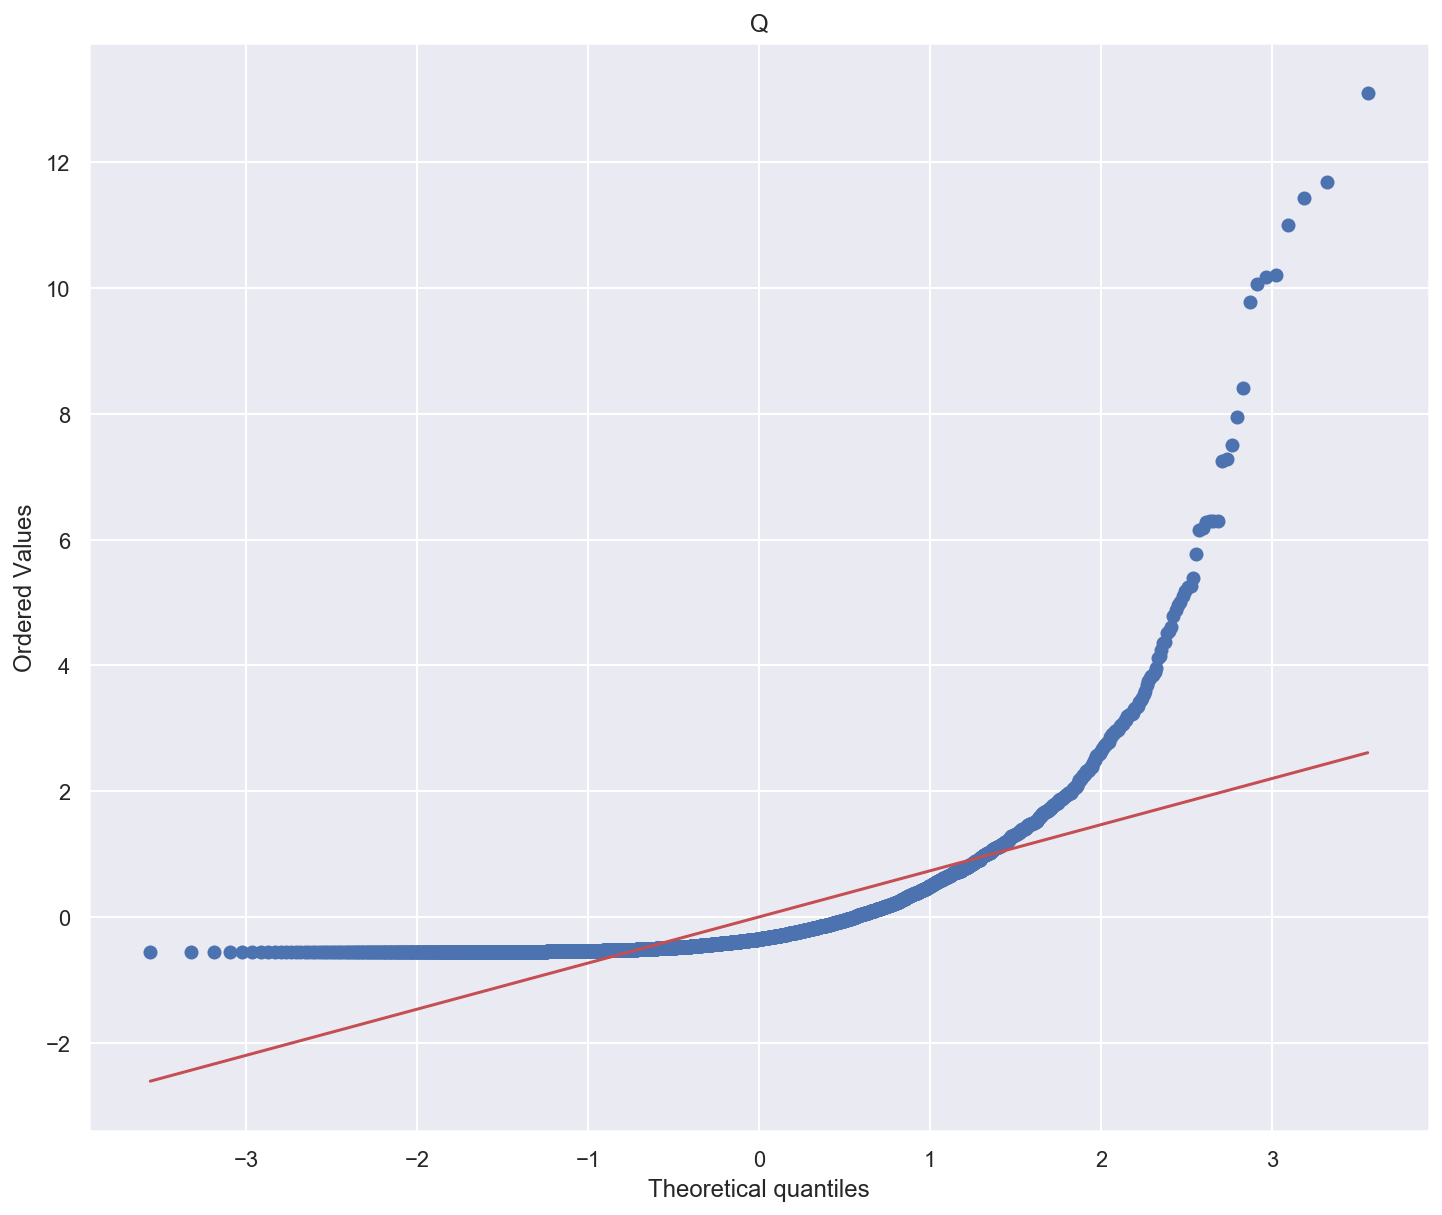

In [92]:
QQplot(SnoMC_ridge_outcomes,'Q')